<a href="https://colab.research.google.com/github/sanulisiya/Telco-churn-prediction20231263/blob/main/Machine_Learning_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [15]:
# ============================
# Standard Data Manipulation
# ============================
import pandas as pd
import numpy as np

# ============================
# Visualization Libraries
# ============================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# ============================
# Scikit-learn (Task 2)
# ============================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score
)
from sklearn.tree import DecisionTreeClassifier

# ============================
# TensorFlow / Keras (Neural Network)
# ============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ============================
# Ignore Warnings for Cleaner Output
# ============================
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully!")


All libraries imported successfully!


Load the dataset


In [11]:
# Load the Telco Customer Churn dataset from GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Let's see what we loaded
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst 5 rows of the dataset:")
df.head()

The dataset has 7043 rows and 21 columns

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Task 1**


Exploratory Data Analysis (EDA)

Data inspection

In [4]:
# === DETAILED DATA INSPECTION ===

# 1. Check the data types and missing values
print("== DATASET INFO ==")
df.info()

== DATASET INFO ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

In [5]:
# 3. Get statistical summary of numerical columns
print("== NUMERICAL COLUMNS STATISTICS ==")
df.describe()

== NUMERICAL COLUMNS STATISTICS ==


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Numerical Features Analysis


HISTOGRAMS OF NUMERICAL FEATURES
Consider filling or removing these values before analysis


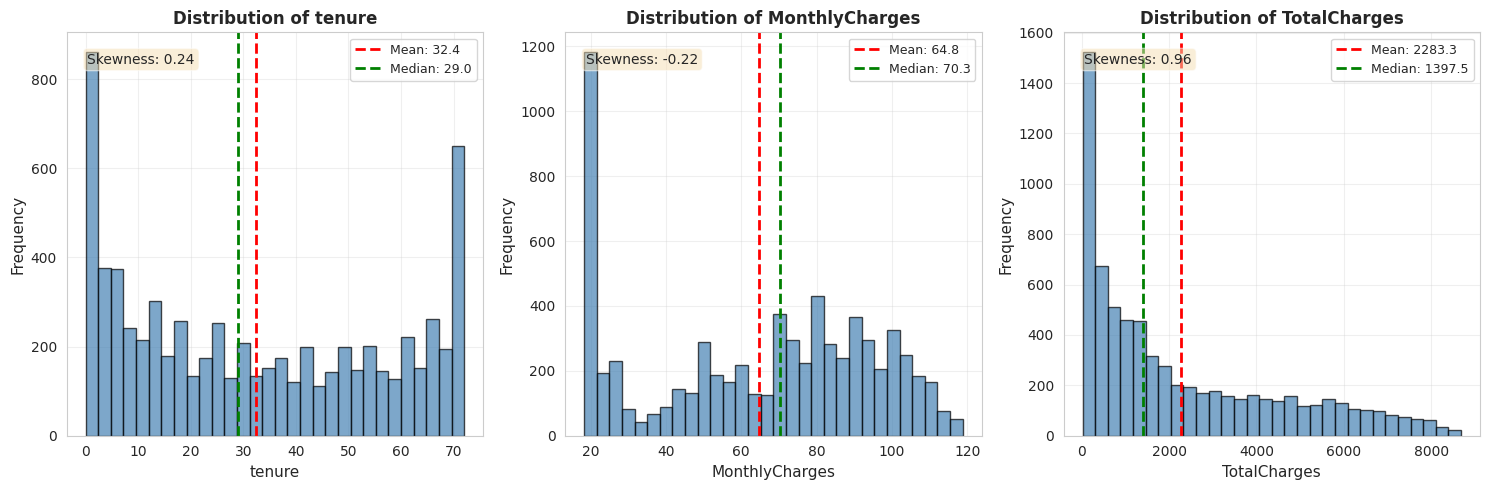


HISTOGRAM INSIGHTS:
----------------------------------------
• tenure: Approximately symmetric (skewness = 0.24)
• MonthlyCharges: Approximately symmetric (skewness = -0.22)
• TotalCharges: Moderately skewed (right-skewed, skewness = 0.96)


In [19]:
# HISTOGRAMS OF NUMERICAL FEATURES
print("\n" + "="*60)
print("HISTOGRAMS OF NUMERICAL FEATURES")
print("="*60)

# Select numerical columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert TotalCharges to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values after conversion
missing_total = df['TotalCharges'].isnull().sum()
if missing_total > 0:
    print(f"Warning: {missing_total} non-numeric values found in TotalCharges and converted to NaN")
    print("Consider filling or removing these values before analysis")

# Create histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, feature in enumerate(numerical_features):
    # Drop NaN values for this feature's histogram
    feature_data = df[feature].dropna()

    if len(feature_data) == 0:
        print(f"Skipping {feature}: No valid numeric data")
        continue

    axes[idx].hist(feature_data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)

    # Add statistics
    mean_val = feature_data.mean()
    median_val = feature_data.median()
    skewness = feature_data.skew()

    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                     label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2,
                     label=f'Median: {median_val:.1f}')
    axes[idx].legend(fontsize=9)

    # Add skewness annotation
    axes[idx].text(0.05, 0.95, f'Skewness: {skewness:.2f}',
                  transform=axes[idx].transAxes, fontsize=10,
                  verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print histogram insights
print("\nHISTOGRAM INSIGHTS:")
print("-"*40)
for feature in numerical_features:
    feature_data = df[feature].dropna()
    if len(feature_data) == 0:
        print(f"• {feature}: No valid numeric data")
        continue

    skew_val = feature_data.skew()

    if abs(skew_val) > 0.5:
        skew_type = "Moderately skewed" if abs(skew_val) < 1 else "Highly skewed"
        direction = "right" if skew_val > 0 else "left"
        print(f"• {feature}: {skew_type} ({direction}-skewed, skewness = {skew_val:.2f})")
    else:
        print(f"• {feature}: Approximately symmetric (skewness = {skew_val:.2f})")

BOXPLOTS OF NUMERICAL FEATURES


BOXPLOTS OF NUMERICAL FEATURES


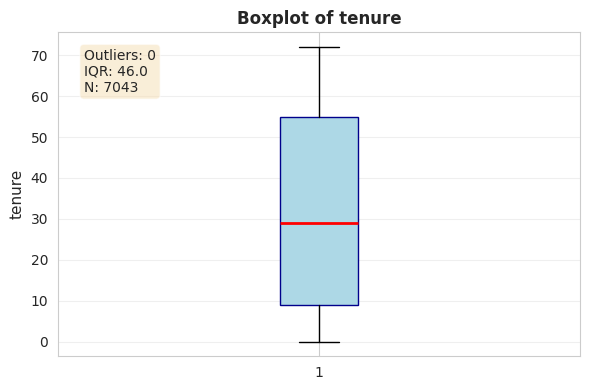

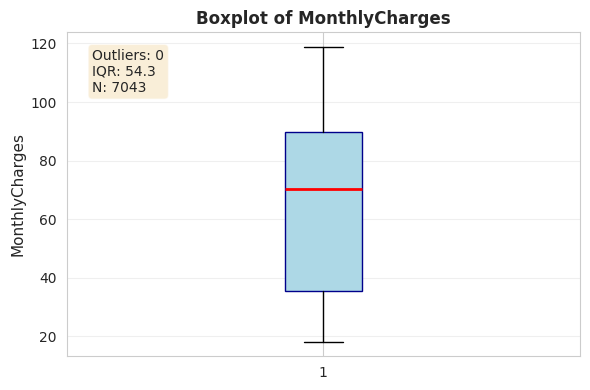

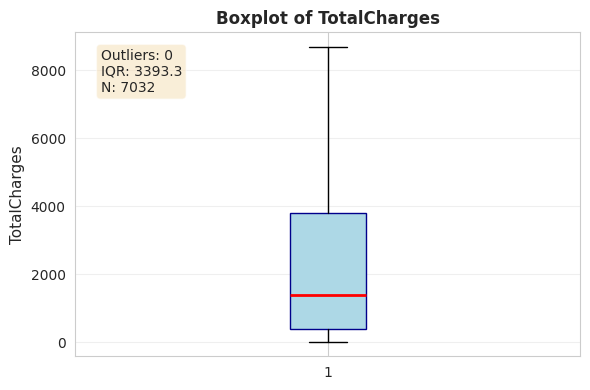

In [30]:
# BOXPLOTS OF NUMERICAL FEATURES
print("\n" + "="*60)
print("BOXPLOTS OF NUMERICAL FEATURES")
print("="*60)

# First, ensure TotalCharges is numeric (if not already done)
if not pd.api.types.is_numeric_dtype(df['TotalCharges']):
    print("Converting TotalCharges to numeric...")
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


for idx, feature in enumerate(numerical_features):
    # Drop NaN values for this feature
    feature_data = df[feature].dropna()

    if len(feature_data) == 0:
        print(f"Skipping {feature}: No valid numeric data")
        axes[idx].text(0.5, 0.5, f'No data for {feature}',
                      transform=axes[idx].transAxes,
                      horizontalalignment='center',
                      verticalalignment='center',
                      fontsize=12)
        axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
        continue

#     # Create boxplot
#     box = axes[idx].boxplot(feature_data, vert=True, patch_artist=True,
#                            boxprops=dict(facecolor='lightblue', color='darkblue'),
#                            medianprops=dict(color='red', linewidth=2),
#                            whiskerprops=dict(color='black'),
#                            capprops=dict(color='black'))

#     axes[idx].set_ylabel(feature, fontsize=11)
#     axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
#     axes[idx].grid(axis='y', alpha=0.3)

#     # Add statistics
#     q1 = feature_data.quantile(0.25)
#     q3 = feature_data.quantile(0.75)
#     iqr = q3 - q1
#     outliers = len(feature_data[(feature_data < q1 - 1.5*iqr) | (feature_data > q3 + 1.5*iqr)])

#     axes[idx].text(0.05, 0.95, f'Outliers: {outliers}\nIQR: {iqr:.1f}',
#                   transform=axes[idx].transAxes, fontsize=10,
#                   verticalalignment='top',
#                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

#     plt.tight_layout()
# plt.show()



# Create separate figures for each feature
for feature in numerical_features:
    feature_data = df[feature].dropna()

    if len(feature_data) == 0:
        print(f"\nNo data for {feature}")
        continue

    fig, ax = plt.subplots(figsize=(6, 4))

    # Create boxplot
    bp = ax.boxplot(feature_data, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='darkblue'),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))

    ax.set_ylabel(feature, fontsize=11)
    ax.set_title(f'Boxplot of {feature}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

    # Add statistics
    q1 = feature_data.quantile(0.25)
    q3 = feature_data.quantile(0.75)
    iqr = q3 - q1
    outliers = len(feature_data[(feature_data < q1 - 1.5*iqr) | (feature_data > q3 + 1.5*iqr)])

    stats_text = f'Outliers: {outliers}\nIQR: {iqr:.1f}\nN: {len(feature_data)}'
    ax.text(0.05, 0.95, stats_text,
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

Categorical Columns check

In [21]:
# 4. Check categorical columns
print("== CATEGORICAL COLUMNS ==")
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Show unique values in a few important categorical columns
print("\n== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==")
print("Churn values:", df['Churn'].unique())
print("Contract types:", df['Contract'].unique())
print("Payment methods:", df['PaymentMethod'].unique())

== CATEGORICAL COLUMNS ==
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==
Churn values: ['No' 'Yes']
Contract types: ['Month-to-month' 'One year' 'Two year']
Payment methods: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Categorical Features Analysis


BAR PLOTS OF CATEGORICAL FEATURES


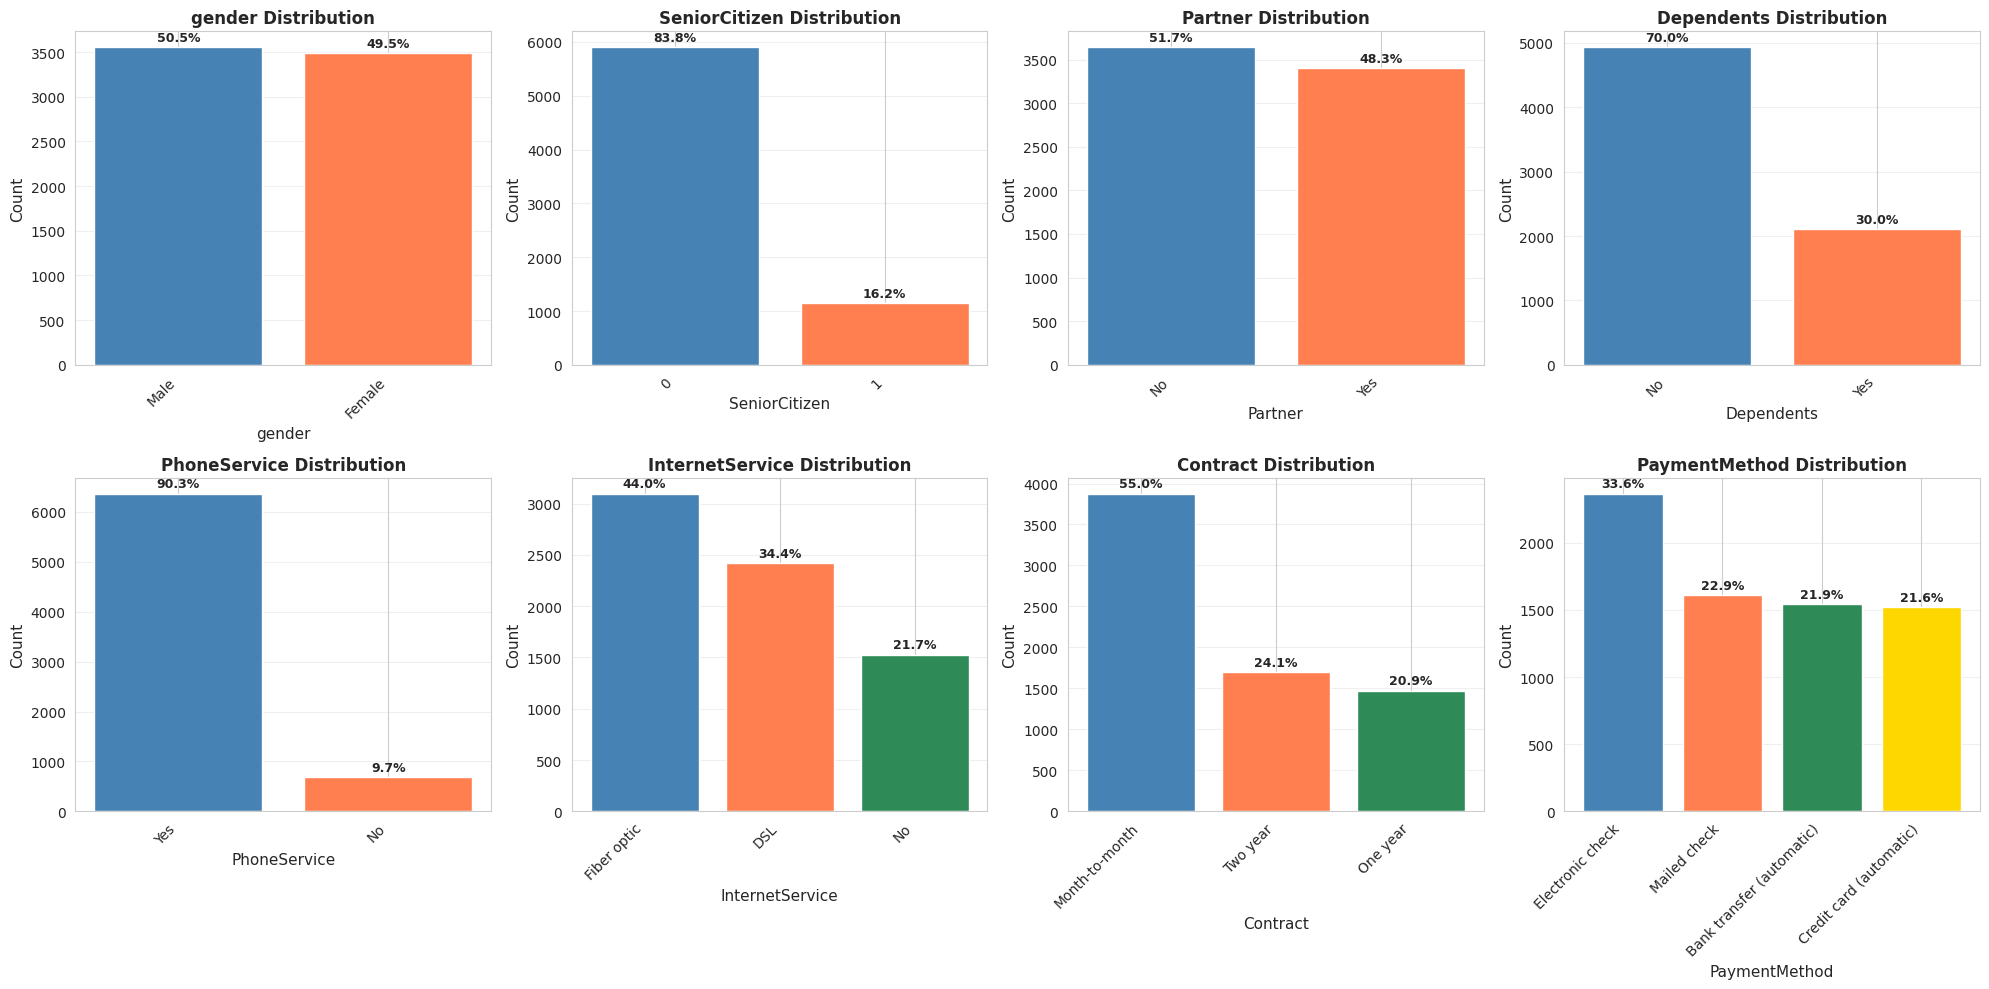

In [31]:
# BAR PLOTS OF CATEGORICAL FEATURES
print("\n" + "="*60)
print("BAR PLOTS OF CATEGORICAL FEATURES")
print("="*60)

# Select key categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']

# Create bar plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    # Calculate value counts
    value_counts = df[feature].value_counts()
    percentages = value_counts / len(df) * 100

    # Create bar plot
    bars = axes[idx].bar(range(len(value_counts)), value_counts.values,
                        color=['steelblue', 'coral', 'seagreen', 'gold'][:len(value_counts)])
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3)

    # Add percentage labels
    for bar_idx, (bar, count, percent) in enumerate(zip(bars, value_counts.values, percentages.values)):
        axes[idx].text(bar_idx, count + max(value_counts.values)*0.02,
                      f'{percent:.1f}%', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


Data Cleaning

In [32]:
# Before conversion: show problem rows (if any)
print("\nSample TotalCharges values (first 10):")
print(df["TotalCharges"].head(10).tolist())

# Convert TotalCharges to numeric, coercing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("\nAfter conversion, NaNs in TotalCharges:", df["TotalCharges"].isna().sum())

# Show rows with NaN TotalCharges
if df["TotalCharges"].isna().sum() > 0:
    print("\nRows with missing TotalCharges (will display up to 10):")
    display(df[df["TotalCharges"].isna()].head(10))

# In original dataset there are 11 rows with blank TotalCharges (very small fraction)
# Safe option: drop those rows (document this in report)
df_clean = df.dropna(subset=["TotalCharges"]).copy()
print("\nShape after dropping rows with missing TotalCharges:", df_clean.shape)



Sample TotalCharges values (first 10):
[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95]

After conversion, NaNs in TotalCharges: 11

Rows with missing TotalCharges (will display up to 10):


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No



Shape after dropping rows with missing TotalCharges: (7032, 21)


Drop Customer ID

In [44]:
# Drop the 'customerID' column if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Verify
print(df.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  


Sample TotalCharges values (first 10):
[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95]

After conversion, NaNs in TotalCharges: 11

Rows with missing TotalCharges (will display up to 10):


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No



Shape after dropping rows with missing TotalCharges: (7032, 21)


In [34]:
# 5. Check the target variable distribution
print("== TARGET VARIABLE DISTRIBUTION (CHURN) ==")
churn_distribution = df['Churn'].value_counts()
print(churn_distribution)

# Calculate percentages
print("\n== CHURN PERCENTAGES ==")
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentages)

== TARGET VARIABLE DISTRIBUTION (CHURN) ==
Churn
No     5174
Yes    1869
Name: count, dtype: int64

== CHURN PERCENTAGES ==
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


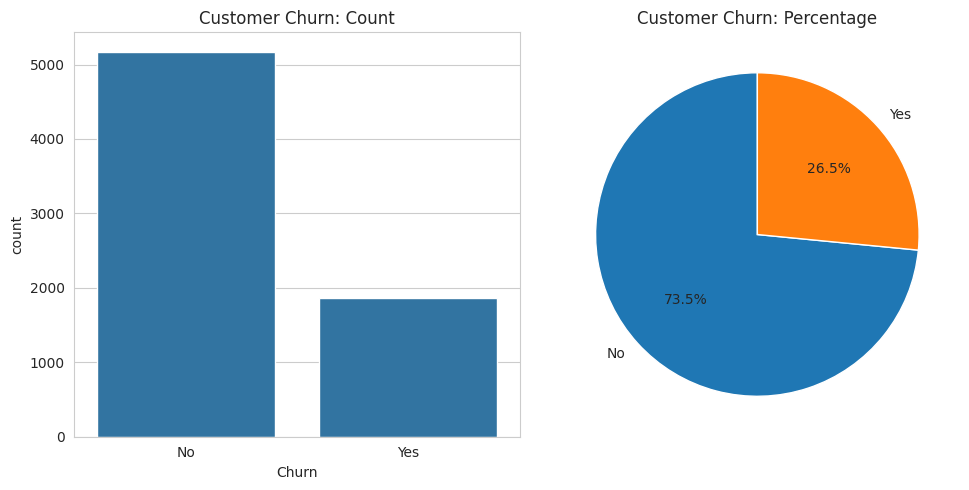

Customers who DID NOT churn: 5174 (73.5%)
Customers who CHURNED: 1869 (26.5%)


In [35]:
 #=== VISUALIZE CHURN DISTRIBUTION ===
plt.figure(figsize=(10, 5))

# First subplot - Count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn: Count')

# Second subplot - Pie chart
plt.subplot(1, 2, 2)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn: Percentage')

plt.tight_layout()
plt.show()

# Print the exact numbers
print(f"Customers who DID NOT churn: {churn_counts['No']} ({churn_counts['No']/len(df)*100:.1f}%)")
print(f"Customers who CHURNED: {churn_counts['Yes']} ({churn_counts['Yes']/len(df)*100:.1f}%)")

visualization of target variable



COUNT PLOTS: CATEGORICAL FEATURES BY CHURN STATUS


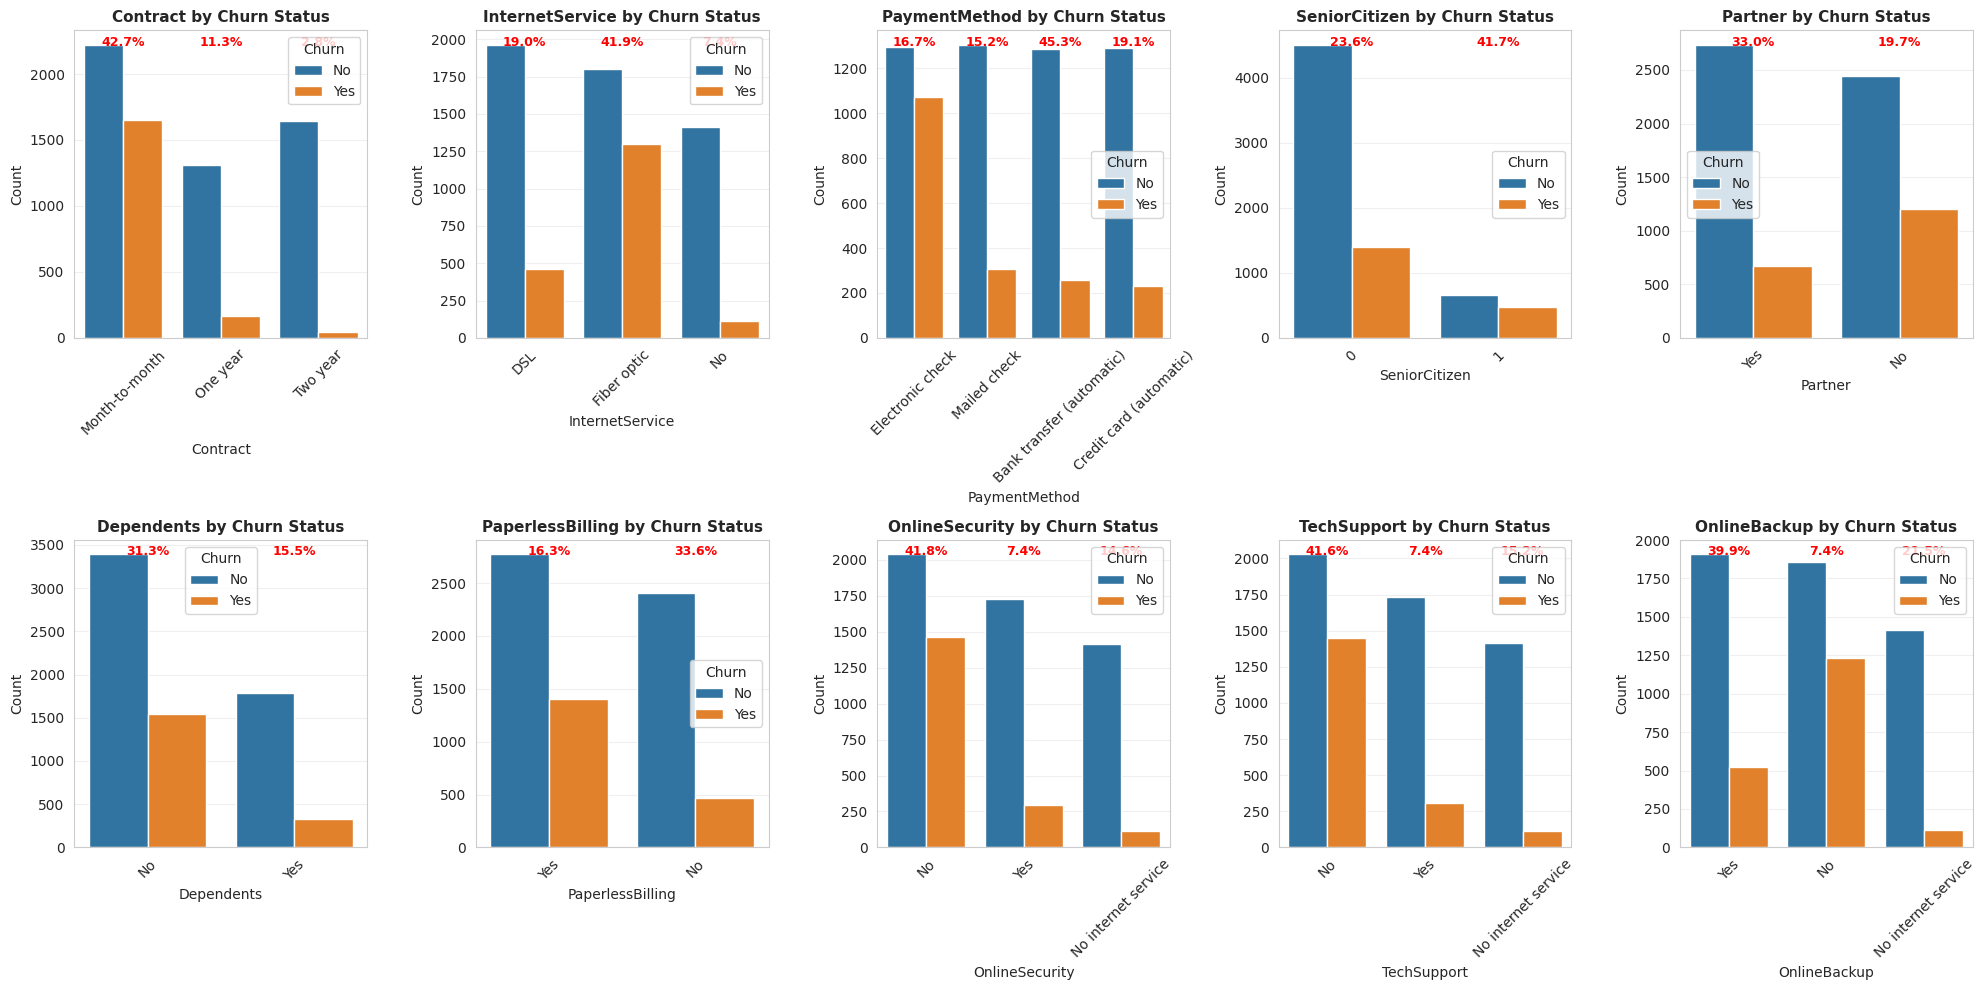


CHURN RATES BY CATEGORY:
--------------------------------------------------

Contract:
  Month-to-month: 42.7% churn rate
  One year: 11.3% churn rate
  Two year: 2.8% churn rate

InternetService:
  Fiber optic: 41.9% churn rate
  DSL: 19.0% churn rate
  No: 7.4% churn rate

PaymentMethod:
  Electronic check: 45.3% churn rate
  Mailed check: 19.1% churn rate
  Bank transfer (automatic): 16.7% churn rate
  Credit card (automatic): 15.2% churn rate

SeniorCitizen:
  1: 41.7% churn rate
  0: 23.6% churn rate

Partner:
  No: 33.0% churn rate
  Yes: 19.7% churn rate

Dependents:
  No: 31.3% churn rate
  Yes: 15.5% churn rate

PaperlessBilling:
  Yes: 33.6% churn rate
  No: 16.3% churn rate

OnlineSecurity:
  No: 41.8% churn rate
  Yes: 14.6% churn rate
  No internet service: 7.4% churn rate

TechSupport:
  No: 41.6% churn rate
  Yes: 15.2% churn rate
  No internet service: 7.4% churn rate

OnlineBackup:
  No: 39.9% churn rate
  Yes: 21.5% churn rate
  No internet service: 7.4% churn rate


In [36]:
# COUNT PLOTS WITH TARGET VARIABLE
print("\n" + "="*60)
print("COUNT PLOTS: CATEGORICAL FEATURES BY CHURN STATUS")
print("="*60)

# Select key categorical features for churn analysis
key_features = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen',
                'Partner', 'Dependents', 'PaperlessBilling', 'OnlineSecurity',
                'TechSupport', 'OnlineBackup']

# Create count plots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    # Create count plot
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[idx])

    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_title(f'{feature} by Churn Status', fontsize=11, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Churn', labels=['No', 'Yes'])
    axes[idx].grid(axis='y', alpha=0.3)

    # Calculate churn rates
    churn_data = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack()
    if 'Yes' in churn_data.columns:
        # Add churn rate annotation
        for i, (category, rates) in enumerate(churn_data.iterrows()):
            churn_rate = rates['Yes'] if 'Yes' in rates.index else 0
            axes[idx].text(i, axes[idx].get_ylim()[1]*0.95,
                          f'{churn_rate:.1%}', ha='center', fontsize=9,
                          fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Print detailed churn rate analysis
print("\nCHURN RATES BY CATEGORY:")
print("-"*50)
for feature in key_features:
    print(f"\n{feature}:")
    churn_rates = df.groupby(feature)['Churn'].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).sort_values(ascending=False)

    for category, rate in churn_rates.items():
        print(f"  {category}: {rate:.1f}% churn rate")

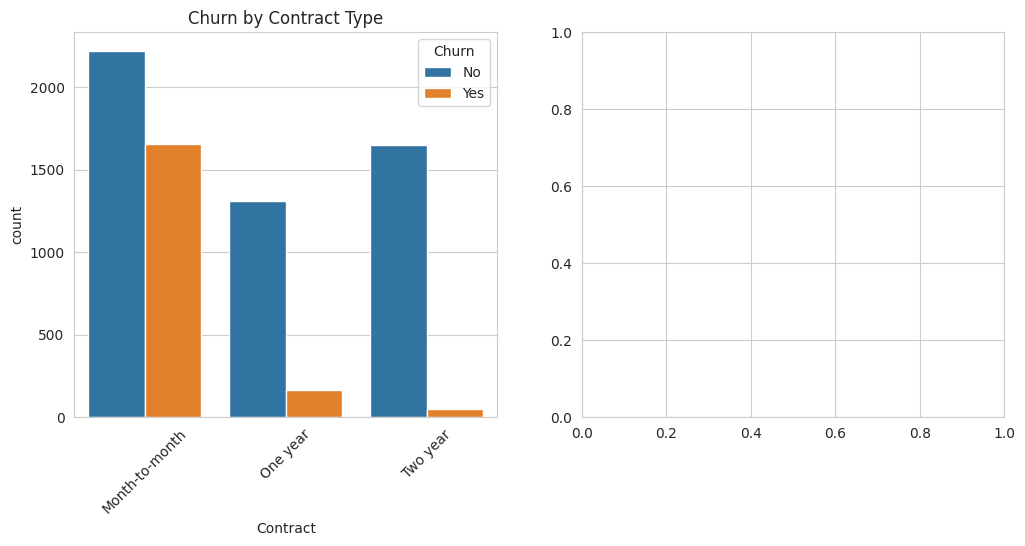

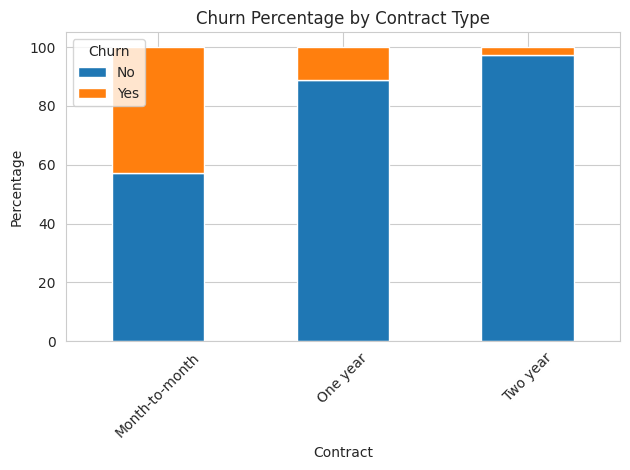

In [37]:
# == HOW CONTRACT TYPE AFFECTS CHURN ==
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)

plt.subplot(1, 2,2)
# Calculate churn rates by contract type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Percentage by Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Churn rate per category

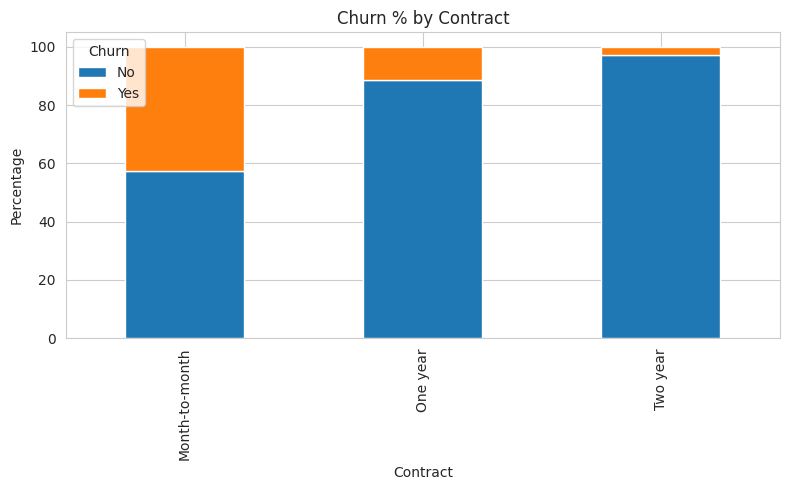

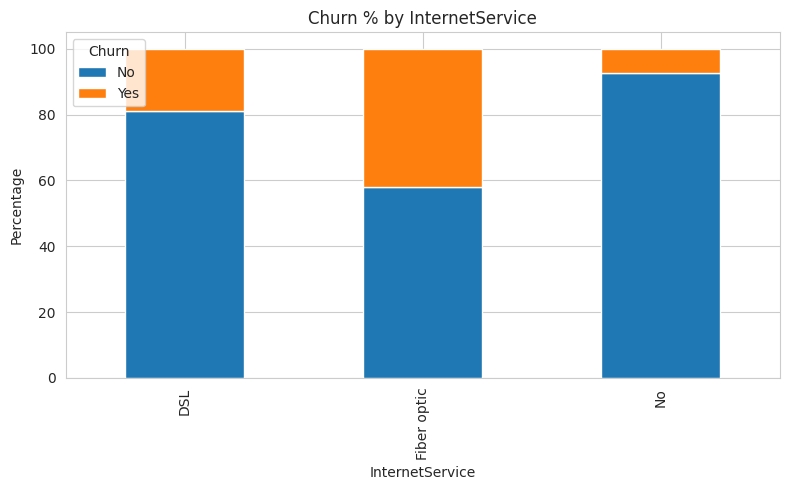

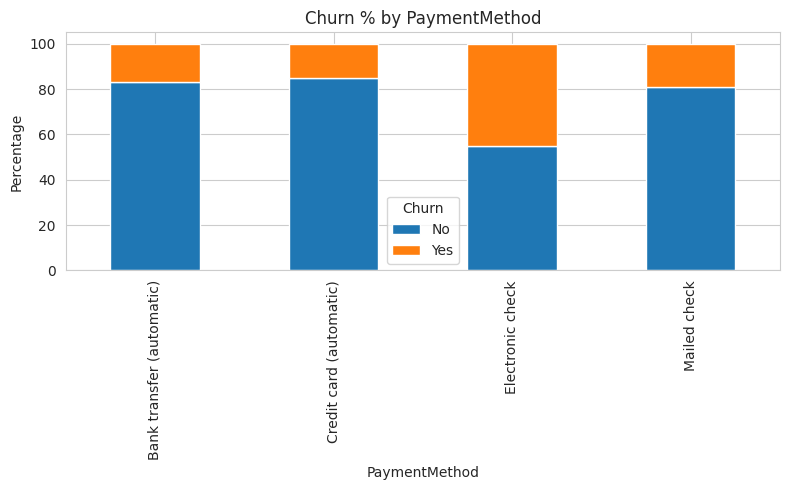

In [38]:
# ------------- Stacked percentage bar (churn rate per category) -------------
def stacked_percent_bar(col):
    ct = pd.crosstab(df_clean[col], df_clean["Churn"], normalize="index")*100
    ct = ct[["No","Yes"]] if "No" in ct.columns and "Yes" in ct.columns else ct
    ct.plot(kind="bar", stacked=True, figsize=(8,5))
    plt.legend(title="Churn")
    plt.ylabel("Percentage")
    plt.title(f"Churn % by {col}")
    plt.tight_layout()
    plt.show()

stacked_percent_bar("Contract")
stacked_percent_bar("InternetService")
stacked_percent_bar("PaymentMethod")

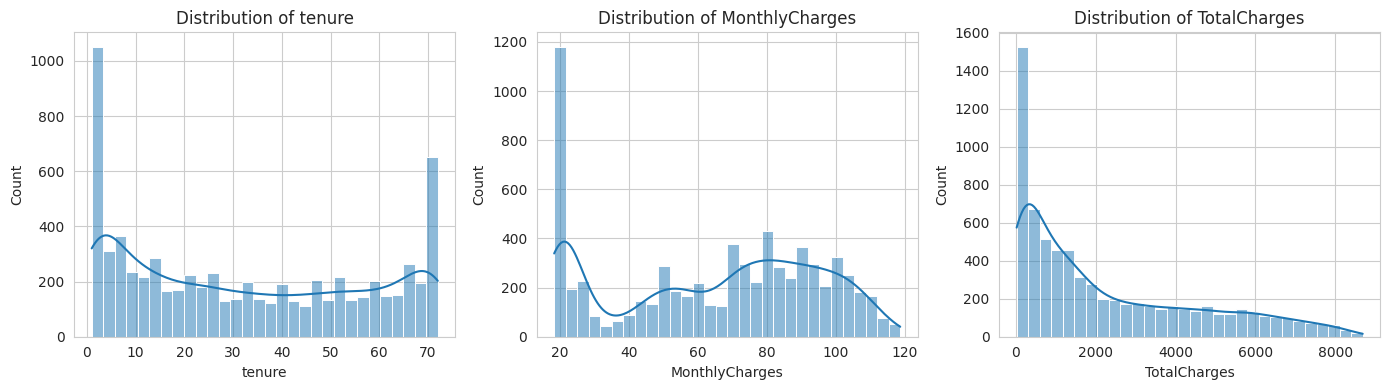

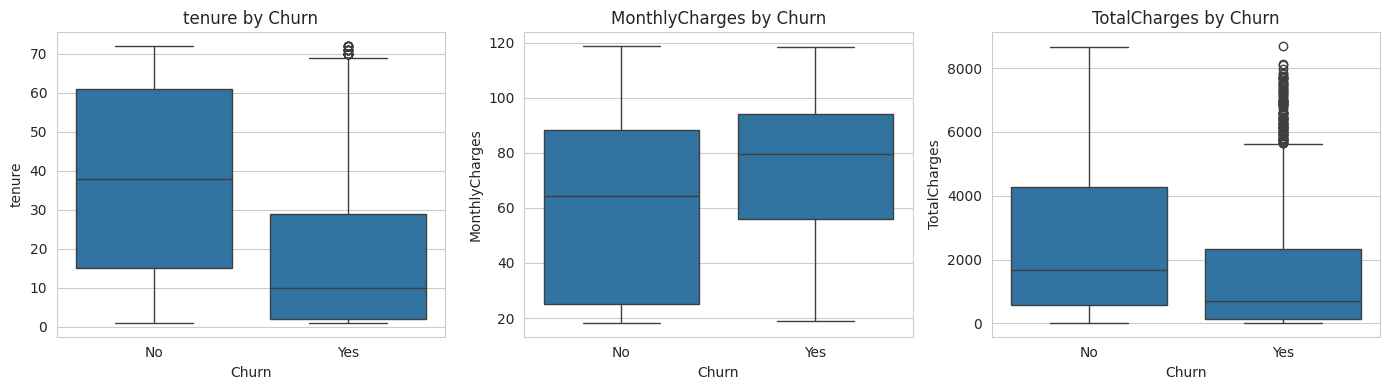

In [39]:
# ------------- Numeric distributions and churn relation -------------
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(14,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,3,i)
    sns.histplot(df_clean, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots by churn
plt.figure(figsize=(14,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,3,i)
    sns.boxplot(data=df_clean, x="Churn", y=col)
    plt.title(f"{col} by Churn")
plt.tight_layout()
plt.show()

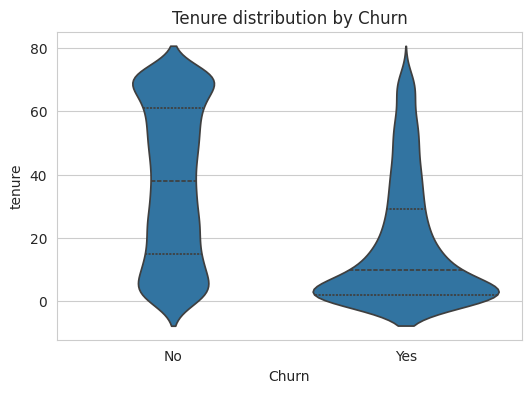

In [40]:
# Violin for tenure (gives distribution shape)
plt.figure(figsize=(6,4))
sns.violinplot(data=df_clean, x="Churn", y="tenure", inner="quartile")
plt.title("Tenure distribution by Churn")
plt.show()

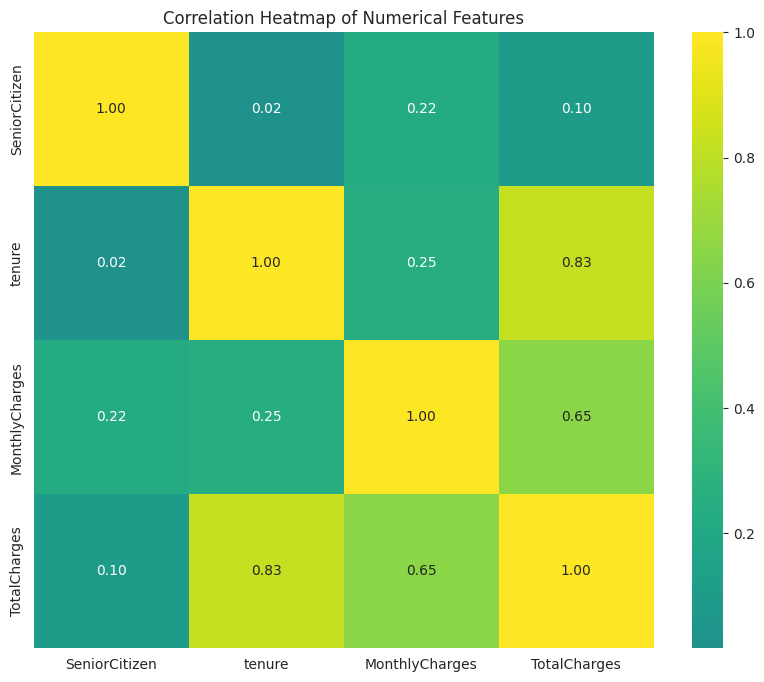

In [41]:
# === CORRELATION BETWEEN NUMERICAL FEATURES ===
plt.figure(figsize=(10, 8))

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", center=0, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [42]:
# === DATA QUALITY CHECK ===
print("== DATA QUALITY SUMMARY ==")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for any whitespace or strange values in categorical columns
print("\n=== CHECKING FOR DATA ISSUES ===")
for col in df.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Skip customer ID
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} unique values")
        if len(unique_vals) < 10:  # Only show if not too many values
            print(f"   Values: {unique_vals}")

== DATA QUALITY SUMMARY ==
Total missing values: 11
Duplicate rows: 0

=== CHECKING FOR DATA ISSUES ===
gender: 2 unique values
   Values: ['Female' 'Male']
Partner: 2 unique values
   Values: ['Yes' 'No']
Dependents: 2 unique values
   Values: ['No' 'Yes']
PhoneService: 2 unique values
   Values: ['No' 'Yes']
MultipleLines: 3 unique values
   Values: ['No phone service' 'No' 'Yes']
InternetService: 3 unique values
   Values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
OnlineBackup: 3 unique values
   Values: ['Yes' 'No' 'No internet service']
DeviceProtection: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
TechSupport: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingTV: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingMovies: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
Contract: 3 unique values
   Values: ['Month-to-month' 'One year' 'Two year']
Pa

In [43]:
# === CRITICAL DATA CLEANING/CORRECTION  ===
# === CORRECTED DATA QUALITY CHECK ===
print("\n== DATASET INFO (Cleaned) ==")
# Check that TotalCharges is now a float and there are no NaNs
df.info()

print("\n== DATA QUALITY SUMMARY (Cleaned) ==")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for any whitespace or strange values in categorical columns
print("\n=== CHECKING FOR DATA ISSUES (Categorical) ===")
for col in df.select_dtypes(include=['object']).columns:
    # customerID is now dropped, so we don't need to skip it
    unique_vals = df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values")
    if len(unique_vals) < 10:  # Only show if not too many values
        print(f"    Values: {unique_vals}")
        # ------------- Save cleaned dataset for modeling -------------
df_clean.to_csv("telco_churn_cleaned.csv", index=False)
print("\nSaved cleaned dataset as 'telco_churn_cleaned.csv' in current working directory.")



== DATASET INFO (Cleaned) ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBil

In [21]:
# === KEY INSIGHTS SUMMARY ===
print("== KEY INSIGHTS FROM EDA ==")

# Insight 1: Overall churn rate
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"1. Overall churn rate: {churn_rate:.1f}%")

# Insight 2: Churn by contract type
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\n2. Churn rate by contract type:")
for contract, rate in contract_churn.items():
    print(f"   - {contract}: {rate:.1f}%")

# Insight 3: Average tenure difference
tenure_churn = df.groupby('Churn')['tenure'].mean()
print(f"\n3. Average tenure:")
print(f"   - Churned customers: {tenure_churn['Yes']:.1f} months")
print(f"   - Stayed customers: {tenure_churn['No']:.1f} months")

# Insight 4: Monthly charges difference
charges_churn = df.groupby('Churn')['MonthlyCharges'].mean()
print(f"\n4. Average monthly charges:")
print(f"   - Churned customers: ${charges_churn['Yes']:.2f}")
print(f"   - Stayed customers: ${charges_churn['No']:.2f}")

== KEY INSIGHTS FROM EDA ==
1. Overall churn rate: 26.5%

2. Churn rate by contract type:
   - Month-to-month: 42.7%
   - One year: 11.3%
   - Two year: 2.8%

3. Average tenure:
   - Churned customers: 18.0 months
   - Stayed customers: 37.6 months

4. Average monthly charges:
   - Churned customers: $74.44
   - Stayed customers: $61.27


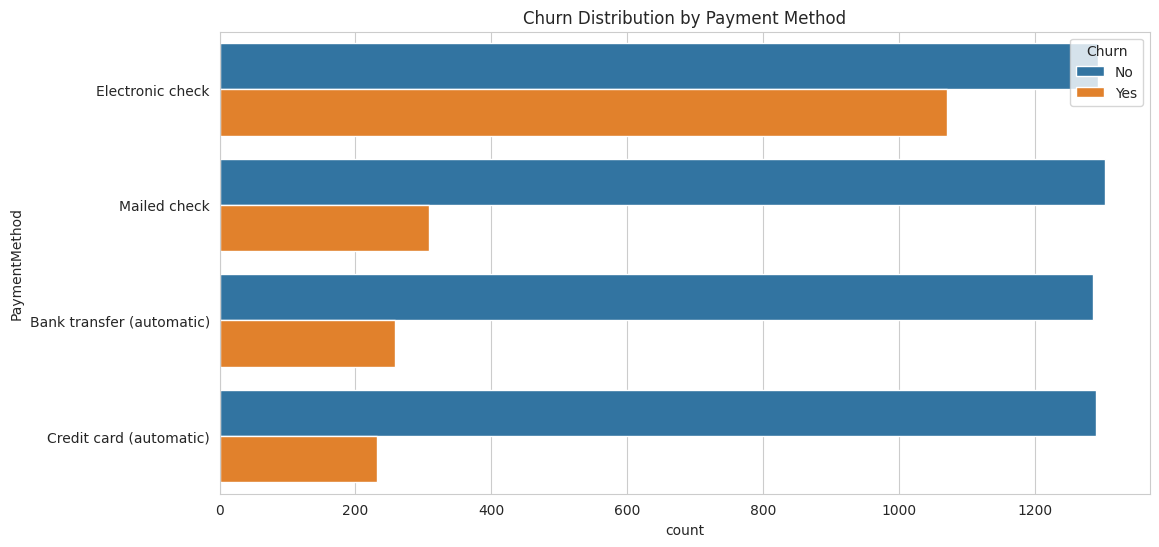

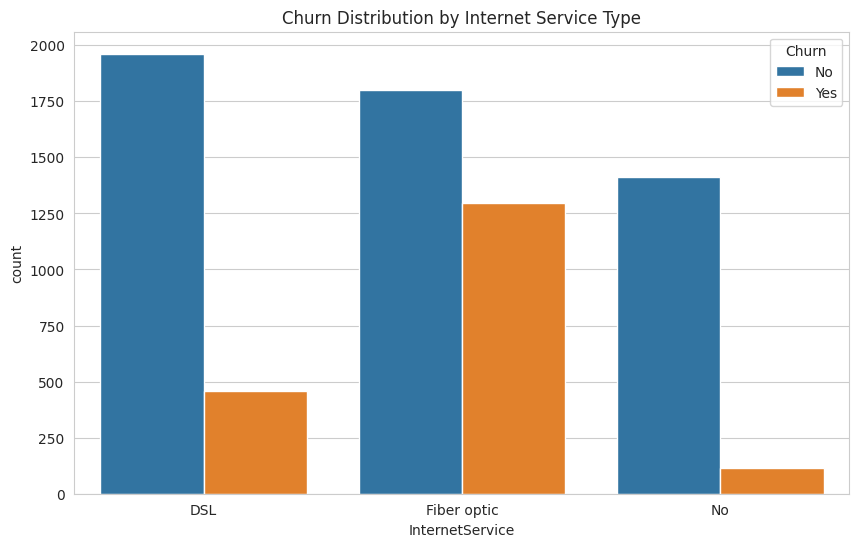

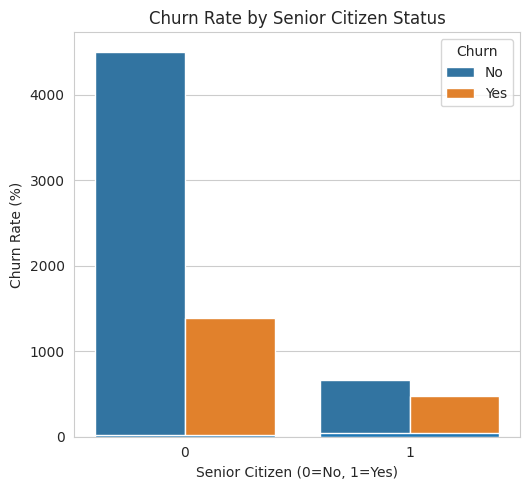

In [45]:
# === ADDITIONAL KEY VISUALIZATIONS ===

# Payment Method vs Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='PaymentMethod', hue='Churn')
plt.title('Churn Distribution by Payment Method')
plt.show()

# Internet Service Type vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Distribution by Internet Service Type')
plt.show()

# Senior Citizen analysis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')

plt.subplot(1, 2, 1)
senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
plt.bar(senior_churn.index, senior_churn.values)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()

Task **2**

Data pre prosseing

In [ ]:
"""TASK 2 - DATA PREPROCESSING PART 1"""
print("="*60)
print("TASK 2: MODEL IMPLEMENTATION & HYPERPARAMETER TUNING")
print("="*60)

# Convert TotalCharges to numeric (already done but included for completeness)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)
print(" TotalCharges converted to numeric")

# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(" Target variable encoded (Yes=1, No=0)")

# Split numeric & categorical features
categorical_cols = df.select_dtypes(include=["object"]).columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop("Churn")
print(f" Identified {len(categorical_cols)} categorical columns")
print(f" Identified {len(numeric_cols)} numeric columns")

TASK 2: MODEL IMPLEMENTATION & HYPERPARAMETER TUNING
✓ TotalCharges converted to numeric
✓ Target variable encoded (Yes=1, No=0)
✓ Identified 15 categorical columns
✓ Identified 4 numeric columns


Decssion Tree preporcessing


In [ ]:
"""DECISION TREE DATA PREPARATION"""
print("\n" + "="*60)
print("DECISION TREE: DATA PREPARATION")
print("="*60)

# Label Encoding for Decision Tree
df_dt = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_dt[col] = le.fit_transform(df_dt[col])

X_dt = df_dt.drop("Churn", axis=1)
y_dt = df_dt["Churn"]

# Split data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, stratify=y_dt, random_state=42
)

print(f" Decision Tree data prepared")
print(f"  Training set: {X_train_dt.shape[0]} samples, {X_train_dt.shape[1]} features")
print(f"  Test set: {X_test_dt.shape[0]} samples")


DECISION TREE: DATA PREPARATION
✓ Decision Tree data prepared
  Training set: 5625 samples, 19 features
  Test set: 1407 samples



SMOTE Balacning

In [ ]:
"""NEURAL NETWORK DATA PREPARATION"""
print("\n" + "="*60)
print("NEURAL NETWORK: DATA PREPARATION")
print("="*60)

# One-Hot Encoding for Neural Network
df_nn = pd.get_dummies(df, drop_first=True)

# Identify numeric columns (excluding the target)
numeric_cols = df_nn.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "Churn"]

# Separate features and target
X_nn = df_nn.drop("Churn", axis=1)
y_nn = df_nn["Churn"]

# Split data
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, stratify=y_nn, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_nn[numeric_cols] = scaler.fit_transform(X_train_nn[numeric_cols])
X_test_nn[numeric_cols] = scaler.transform(X_test_nn[numeric_cols])

print(f"✓ Neural Network data prepared")
print(f"  Training set: {X_train_nn.shape[0]} samples, {X_train_nn.shape[1]} features")
print(f"  Test set: {X_test_nn.shape[0]} samples")

"""DECISION TREE DATA PREPARATION"""
print("\n" + "="*60)
print("DECISION TREE: DATA PREPARATION")
print("="*60)

# Label Encoding for Decision Tree
df_dt = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_dt[col] = le.fit_transform(df_dt[col])

X_dt = df_dt.drop("Churn", axis=1)
y_dt = df_dt["Churn"]

# Split data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, stratify=y_dt, random_state=42
)

print(f"✓ Decision Tree data prepared")
print(f"  Training set: {X_train_dt.shape[0]} samples, {X_train_dt.shape[1]} features")
print(f"  Test set: {X_test_dt.shape[0]} samples")

"""DATA BALANCING WITH SMOTE"""
print("\n" + "="*60)
print("APPLYING SMOTE FOR CLASS BALANCING")
print("="*60)

from imblearn.over_sampling import SMOTE

# Store original counts for visualization
orig_nn_counts = pd.Series(y_train_nn).value_counts()
orig_dt_counts = pd.Series(y_train_dt).value_counts()

print("BEFORE SMOTE:")
print(f"  Neural Network - Class 0: {orig_nn_counts[0]}, Class 1: {orig_nn_counts[1]}")
print(f"  Decision Tree  - Class 0: {orig_dt_counts[0]}, Class 1: {orig_dt_counts[1]}")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_nn_smote, y_train_nn_smote = smote.fit_resample(X_train_nn, y_train_nn)
X_train_dt_smote, y_train_dt_smote = smote.fit_resample(X_train_dt, y_train_dt)

print("\nAFTER SMOTE:")
print(f"  Neural Network - Class 0: {sum(y_train_nn_smote==0)}, Class 1: {sum(y_train_nn_smote==1)}")
print(f"  Decision Tree  - Class 0: {sum(y_train_dt_smote==0)}, Class 1: {sum(y_train_dt_smote==1)}")
print(" Data balanced using SMOTE")

# Update the training sets to use SMOTE-balanced data
X_train_nn, y_train_nn = X_train_nn_smote, y_train_nn_smote
X_train_dt, y_train_dt = X_train_dt_smote, y_train_dt_smote


NEURAL NETWORK: DATA PREPARATION
✓ Neural Network data prepared
  Training set: 5625 samples, 30 features
  Test set: 1407 samples

DECISION TREE: DATA PREPARATION
✓ Decision Tree data prepared
  Training set: 5625 samples, 19 features
  Test set: 1407 samples

APPLYING SMOTE FOR CLASS BALANCING
BEFORE SMOTE:
  Neural Network - Class 0: 4130, Class 1: 1495
  Decision Tree  - Class 0: 4130, Class 1: 1495

AFTER SMOTE:
  Neural Network - Class 0: 4130, Class 1: 4130
  Decision Tree  - Class 0: 4130, Class 1: 4130
✓ Data balanced using SMOTE


Visualize balanced and imbalaned data


CLASS DISTRIBUTION VISUALIZATION
ORIGINAL (IMBALANCED) CLASS DISTRIBUTION:
  Neural Network - Class 0: 4130, Class 1: 1495
  Decision Tree  - Class 0: 4130, Class 1: 1495

BALANCED (AFTER SMOTE) CLASS DISTRIBUTION:
  Neural Network - Class 0: 4130, Class 1: 4130
  Decision Tree  - Class 0: 4130, Class 1: 4130
✓ Saved: Class_Distribution_Bar_Charts.png


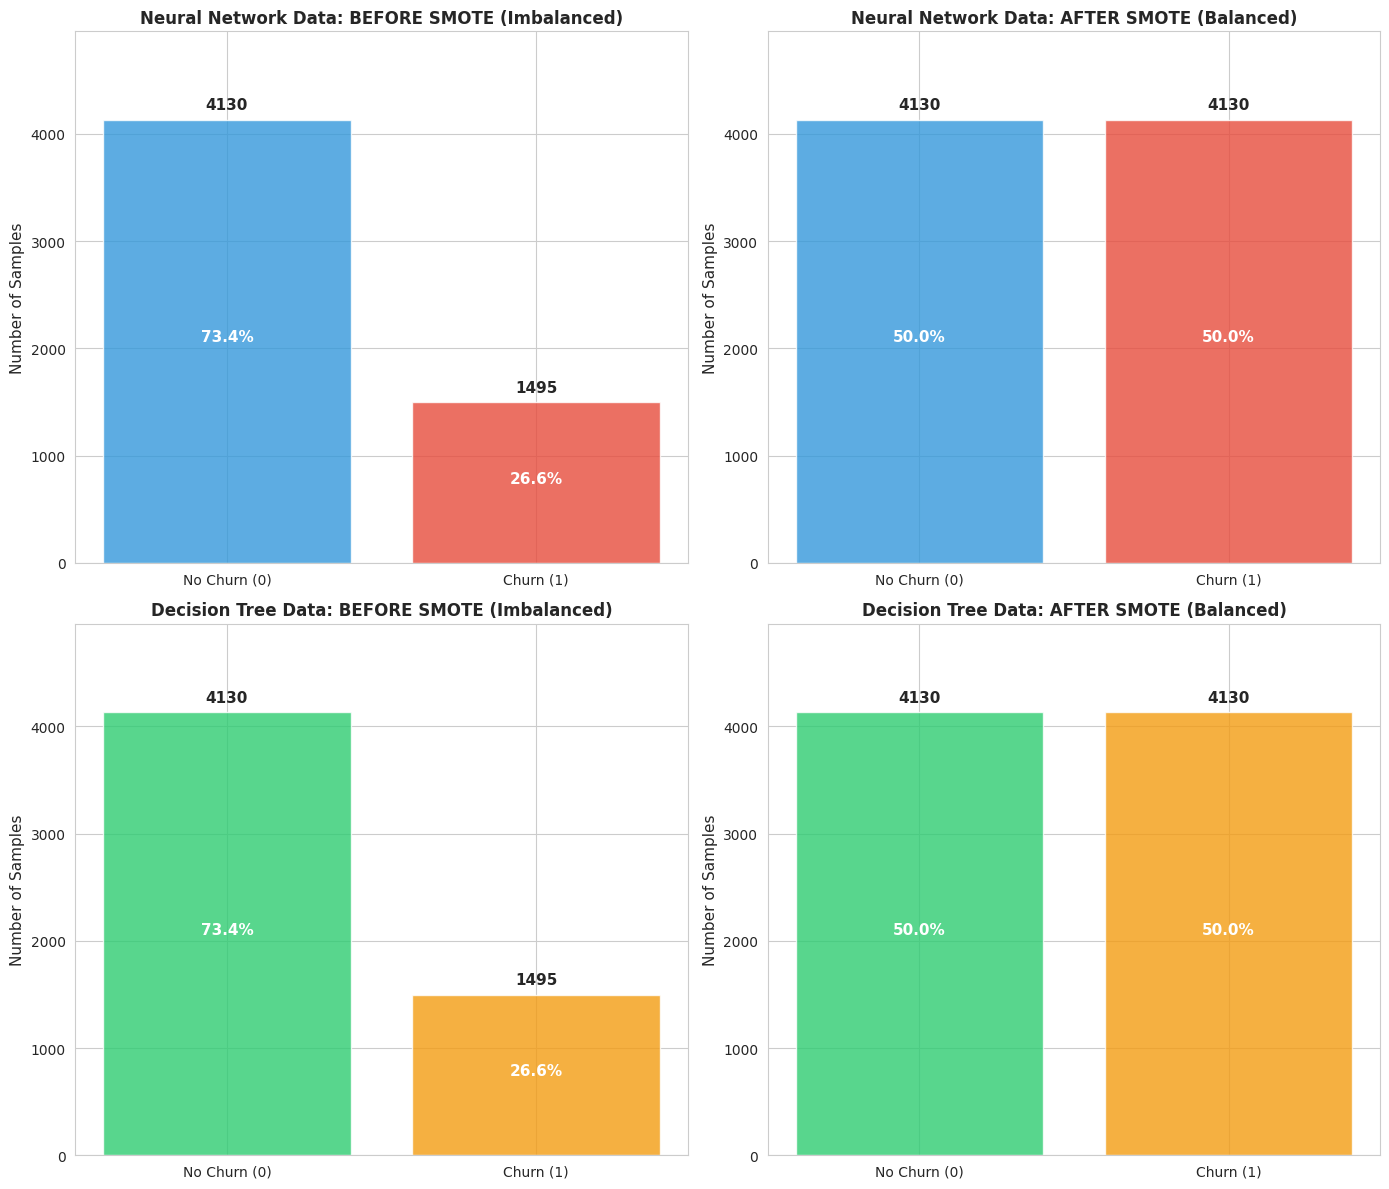

✓ Saved: Class_Distribution_Pie_Charts.png


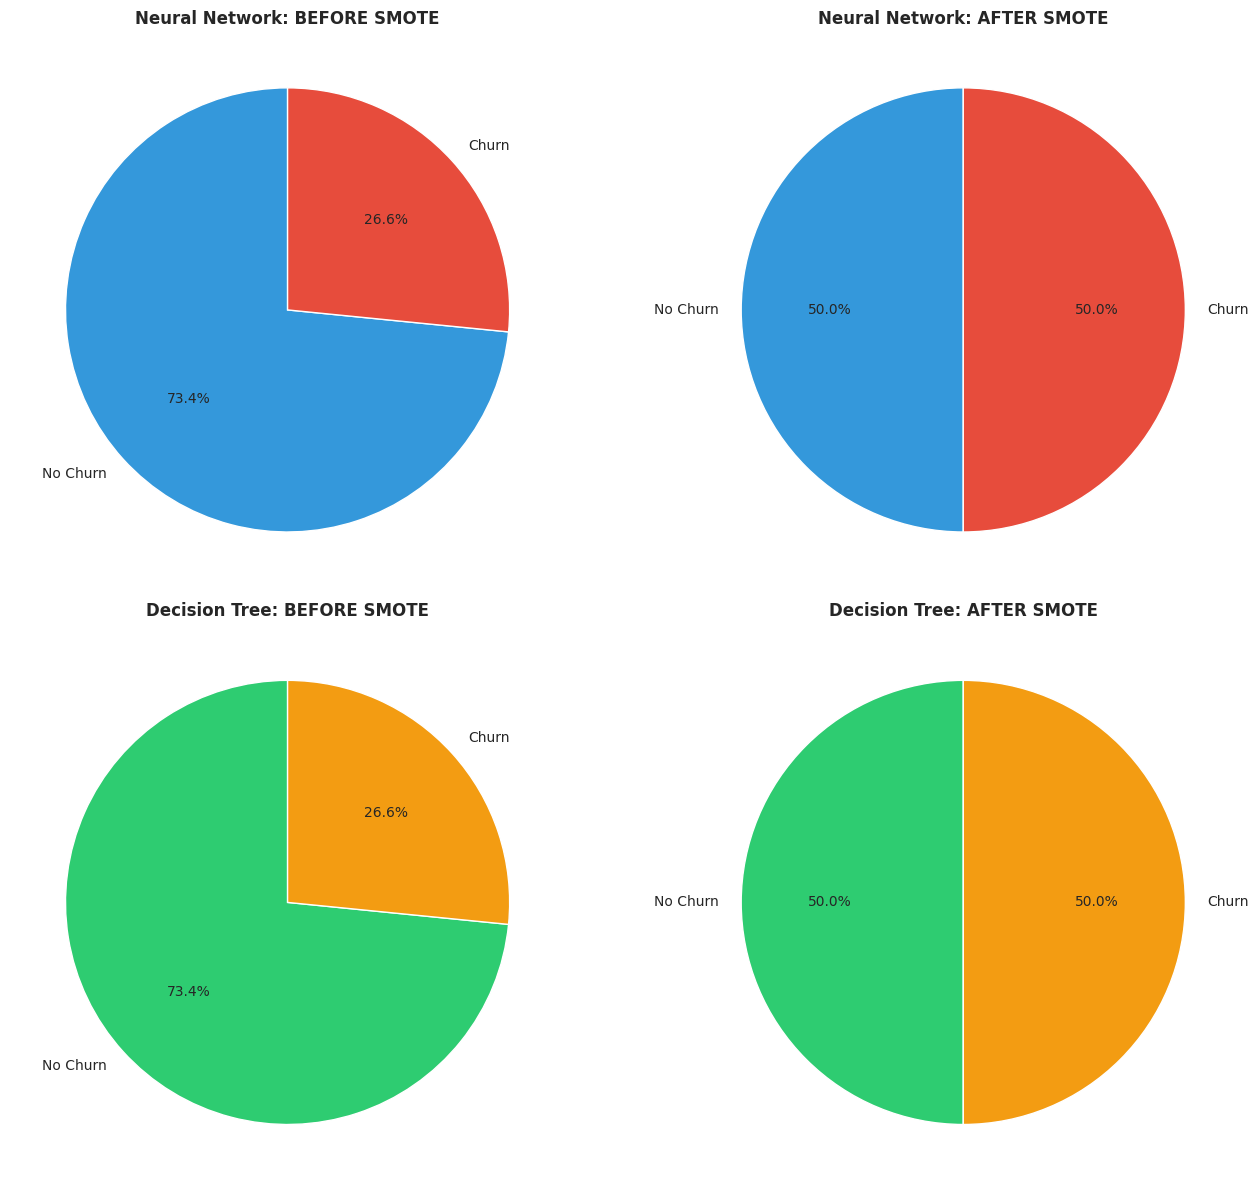

✓ Saved: Imbalance_Ratio_Comparison.png


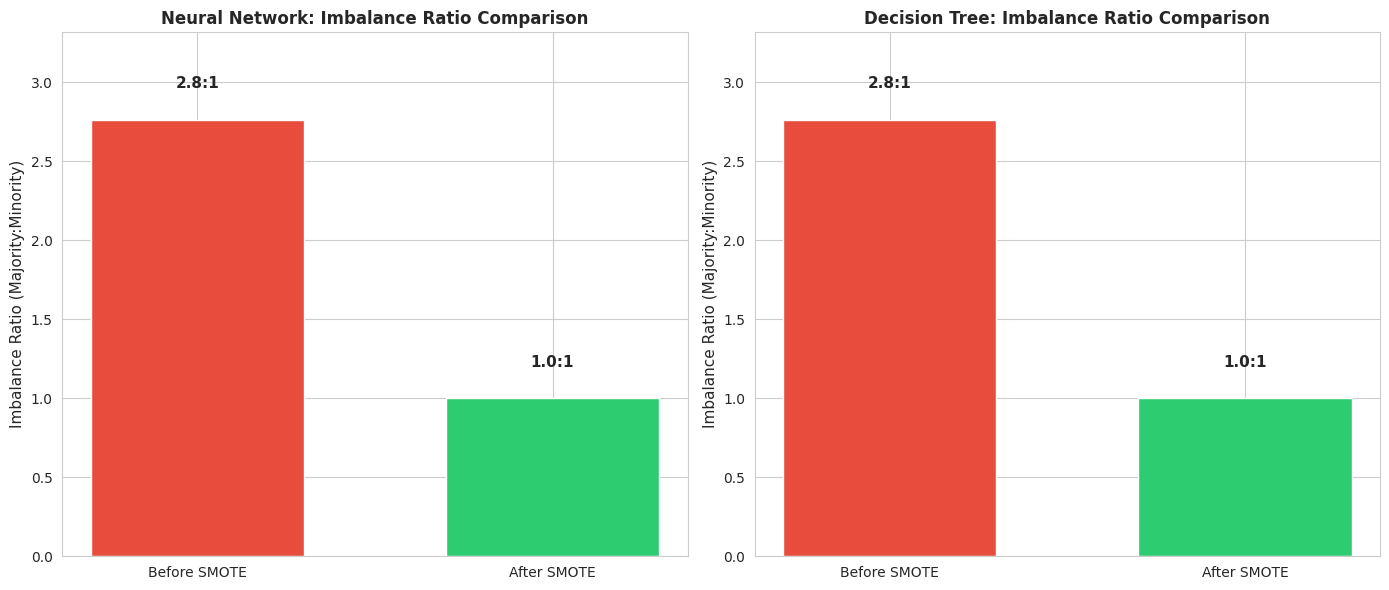

✓ Saved: Churn_Distribution_Graph.png (Comprehensive)


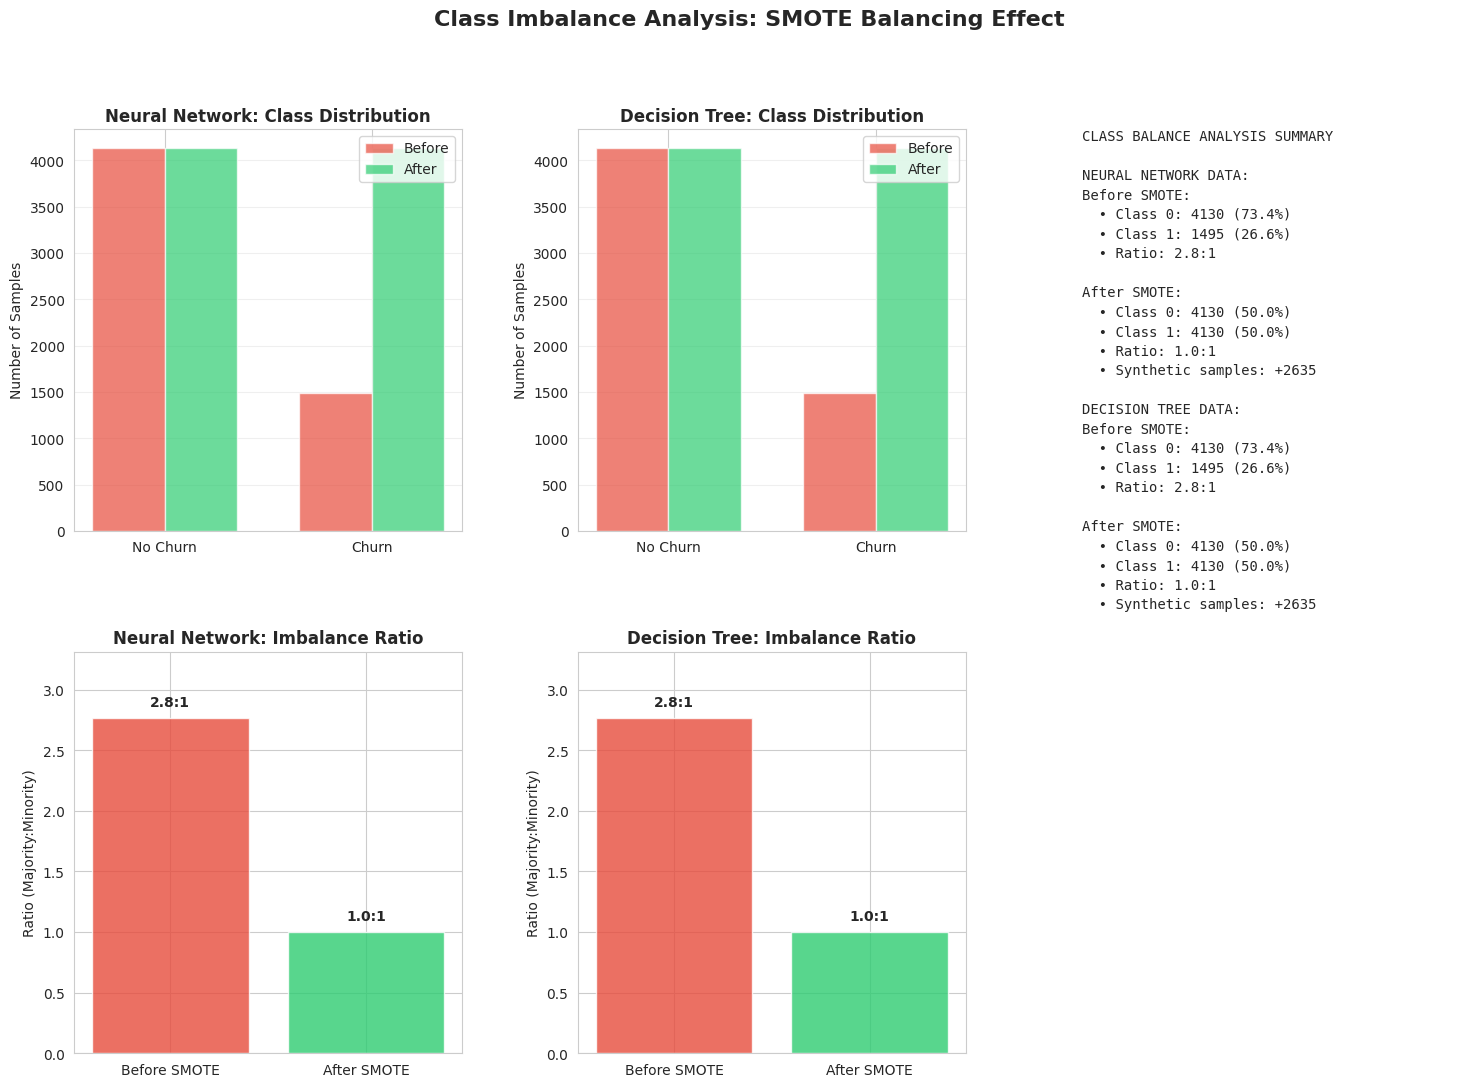


CLASS BALANCE ANALYSIS SUMMARY

NEURAL NETWORK DATA:
----------------------------------------
BEFORE SMOTE (Imbalanced):
  Class 0 (No Churn): 4130 samples (73.4%)
  Class 1 (Churn):    1495 samples (26.6%)
  Imbalance Ratio:    2.8:1

AFTER SMOTE (Balanced):
  Class 0 (No Churn): 4130 samples (50.0%)
  Class 1 (Churn):    4130 samples (50.0%)
  Imbalance Ratio:    1.0:1
  Synthetic samples added: 2635

DECISION TREE DATA:
----------------------------------------
BEFORE SMOTE (Imbalanced):
  Class 0 (No Churn): 4130 samples (73.4%)
  Class 1 (Churn):    1495 samples (26.6%)
  Imbalance Ratio:    2.8:1

AFTER SMOTE (Balanced):
  Class 0 (No Churn): 4130 samples (50.0%)
  Class 1 (Churn):    4130 samples (50.0%)
  Imbalance Ratio:    1.0:1
  Synthetic samples added: 2635

✓ Class imbalance visualization completed
✓ Saved 4 image files:
  1. Class_Distribution_Bar_Charts.png
  2. Class_Distribution_Pie_Charts.png
  3. Imbalance_Ratio_Comparison.png
  4. Churn_Distribution_Graph.png (Comp

In [ ]:
"""VISUALIZE CLASS IMBALANCE & SMOTE BALANCING EFFECT"""
print("\n" + "="*60)
print("CLASS DISTRIBUTION VISUALIZATION")
print("="*60)

# Get the BEFORE SMOTE data (we need to store it before applying SMOTE)
# Re-split to get original imbalanced data for visualization
X_train_nn_orig, _, y_train_nn_orig, _ = train_test_split(
    X_nn, y_nn, test_size=0.2, stratify=y_nn, random_state=42
)

X_train_dt_orig, _, y_train_dt_orig, _ = train_test_split(
    X_dt, y_dt, test_size=0.2, stratify=y_dt, random_state=42
)

# Store original counts
orig_nn_counts = y_train_nn_orig.value_counts()
orig_dt_counts = y_train_dt_orig.value_counts()

print("ORIGINAL (IMBALANCED) CLASS DISTRIBUTION:")
print(f"  Neural Network - Class 0: {orig_nn_counts[0]}, Class 1: {orig_nn_counts[1]}")
print(f"  Decision Tree  - Class 0: {orig_dt_counts[0]}, Class 1: {orig_dt_counts[1]}")

# Now apply SMOTE (if not already applied)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_nn_balanced, y_train_nn_balanced = smote.fit_resample(X_train_nn_orig, y_train_nn_orig)
X_train_dt_balanced, y_train_dt_balanced = smote.fit_resample(X_train_dt_orig, y_train_dt_orig)

# Get balanced counts
balanced_nn_counts = pd.Series(y_train_nn_balanced).value_counts()
balanced_dt_counts = pd.Series(y_train_dt_balanced).value_counts()

print("\nBALANCED (AFTER SMOTE) CLASS DISTRIBUTION:")
print(f"  Neural Network - Class 0: {balanced_nn_counts[0]}, Class 1: {balanced_nn_counts[1]}")
print(f"  Decision Tree  - Class 0: {balanced_dt_counts[0]}, Class 1: {balanced_dt_counts[1]}")

# ============================================
# VISUALIZATION 1: SIDE-BY-SIDE COMPARISON
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Neural Network - Before SMOTE
axes[0, 0].bar(['No Churn (0)', 'Churn (1)'], [orig_nn_counts[0], orig_nn_counts[1]],
               color=['#3498db', '#e74c3c'], alpha=0.8)
axes[0, 0].set_title('Neural Network Data: BEFORE SMOTE (Imbalanced)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Samples', fontsize=11)
axes[0, 0].set_ylim(0, max(orig_nn_counts.values) * 1.2)
for i, count in enumerate([orig_nn_counts[0], orig_nn_counts[1]]):
    axes[0, 0].text(i, count + 100, str(count), ha='center', fontweight='bold', fontsize=11)
    percentage = count/sum(orig_nn_counts)*100
    axes[0, 0].text(i, count/2, f'{percentage:.1f}%', ha='center', fontweight='bold',
                   color='white', fontsize=11)

# Plot 2: Neural Network - After SMOTE
axes[0, 1].bar(['No Churn (0)', 'Churn (1)'], [balanced_nn_counts[0], balanced_nn_counts[1]],
               color=['#3498db', '#e74c3c'], alpha=0.8)
axes[0, 1].set_title('Neural Network Data: AFTER SMOTE (Balanced)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Samples', fontsize=11)
axes[0, 1].set_ylim(0, max(balanced_nn_counts.values) * 1.2)
for i, count in enumerate([balanced_nn_counts[0], balanced_nn_counts[1]]):
    axes[0, 1].text(i, count + 100, str(count), ha='center', fontweight='bold', fontsize=11)
    percentage = count/sum(balanced_nn_counts)*100
    axes[0, 1].text(i, count/2, f'{percentage:.1f}%', ha='center', fontweight='bold',
                   color='white', fontsize=11)

# Plot 3: Decision Tree - Before SMOTE
axes[1, 0].bar(['No Churn (0)', 'Churn (1)'], [orig_dt_counts[0], orig_dt_counts[1]],
               color=['#2ecc71', '#f39c12'], alpha=0.8)
axes[1, 0].set_title('Decision Tree Data: BEFORE SMOTE (Imbalanced)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Samples', fontsize=11)
axes[1, 0].set_ylim(0, max(orig_dt_counts.values) * 1.2)
for i, count in enumerate([orig_dt_counts[0], orig_dt_counts[1]]):
    axes[1, 0].text(i, count + 100, str(count), ha='center', fontweight='bold', fontsize=11)
    percentage = count/sum(orig_dt_counts)*100
    axes[1, 0].text(i, count/2, f'{percentage:.1f}%', ha='center', fontweight='bold',
                   color='white', fontsize=11)

# Plot 4: Decision Tree - After SMOTE
axes[1, 1].bar(['No Churn (0)', 'Churn (1)'], [balanced_dt_counts[0], balanced_dt_counts[1]],
               color=['#2ecc71', '#f39c12'], alpha=0.8)
axes[1, 1].set_title('Decision Tree Data: AFTER SMOTE (Balanced)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Samples', fontsize=11)
axes[1, 1].set_ylim(0, max(balanced_dt_counts.values) * 1.2)
for i, count in enumerate([balanced_dt_counts[0], balanced_dt_counts[1]]):
    axes[1, 1].text(i, count + 100, str(count), ha='center', fontweight='bold', fontsize=11)
    percentage = count/sum(balanced_dt_counts)*100
    axes[1, 1].text(i, count/2, f'{percentage:.1f}%', ha='center', fontweight='bold',
                   color='white', fontsize=11)

plt.tight_layout()

# SAVE FIGURE 1
fig.savefig('Class_Distribution_Bar_Charts.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: Class_Distribution_Bar_Charts.png")

plt.show()

# ============================================
# VISUALIZATION 2: PIE CHARTS COMPARISON
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Neural Network Before SMOTE - Pie Chart
axes[0, 0].pie([orig_nn_counts[0], orig_nn_counts[1]],
               labels=['No Churn', 'Churn'],
               colors=['#3498db', '#e74c3c'],
               autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Neural Network: BEFORE SMOTE', fontsize=12, fontweight='bold')

# Neural Network After SMOTE - Pie Chart
axes[0, 1].pie([balanced_nn_counts[0], balanced_nn_counts[1]],
               labels=['No Churn', 'Churn'],
               colors=['#3498db', '#e74c3c'],
               autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Neural Network: AFTER SMOTE', fontsize=12, fontweight='bold')

# Decision Tree Before SMOTE - Pie Chart
axes[1, 0].pie([orig_dt_counts[0], orig_dt_counts[1]],
               labels=['No Churn', 'Churn'],
               colors=['#2ecc71', '#f39c12'],
               autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Decision Tree: BEFORE SMOTE', fontsize=12, fontweight='bold')

# Decision Tree After SMOTE - Pie Chart
axes[1, 1].pie([balanced_dt_counts[0], balanced_dt_counts[1]],
               labels=['No Churn', 'Churn'],
               colors=['#2ecc71', '#f39c12'],
               autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Decision Tree: AFTER SMOTE', fontsize=12, fontweight='bold')

plt.tight_layout()

# SAVE FIGURE 2
fig.savefig('Class_Distribution_Pie_Charts.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: Class_Distribution_Pie_Charts.png")

plt.show()

# ============================================
# VISUALIZATION 3: IMBALANCE RATIO COMPARISON
# ============================================

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Calculate imbalance ratios
nn_imbalance_before = orig_nn_counts[0] / orig_nn_counts[1]
nn_imbalance_after = balanced_nn_counts[0] / balanced_nn_counts[1]
dt_imbalance_before = orig_dt_counts[0] / orig_dt_counts[1]
dt_imbalance_after = balanced_dt_counts[0] / balanced_dt_counts[1]

# Neural Network imbalance comparison
x_pos = [0, 1]
ax[0].bar(x_pos, [nn_imbalance_before, nn_imbalance_after],
          color=['#e74c3c', '#2ecc71'], width=0.6)
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(['Before SMOTE', 'After SMOTE'])
ax[0].set_ylabel('Imbalance Ratio (Majority:Minority)', fontsize=11)
ax[0].set_title('Neural Network: Imbalance Ratio Comparison', fontsize=12, fontweight='bold')
ax[0].set_ylim(0, max(nn_imbalance_before, nn_imbalance_after) * 1.2)
for i, ratio in enumerate([nn_imbalance_before, nn_imbalance_after]):
    ax[0].text(i, ratio + 0.2, f'{ratio:.1f}:1', ha='center', fontweight='bold', fontsize=11)

# Decision Tree imbalance comparison
ax[1].bar(x_pos, [dt_imbalance_before, dt_imbalance_after],
          color=['#e74c3c', '#2ecc71'], width=0.6)
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(['Before SMOTE', 'After SMOTE'])
ax[1].set_ylabel('Imbalance Ratio (Majority:Minority)', fontsize=11)
ax[1].set_title('Decision Tree: Imbalance Ratio Comparison', fontsize=12, fontweight='bold')
ax[1].set_ylim(0, max(dt_imbalance_before, dt_imbalance_after) * 1.2)
for i, ratio in enumerate([dt_imbalance_before, dt_imbalance_after]):
    ax[1].text(i, ratio + 0.2, f'{ratio:.1f}:1', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()

# SAVE FIGURE 3
fig.savefig('Imbalance_Ratio_Comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: Imbalance_Ratio_Comparison.png")

plt.show()

# ============================================
# CREATE A COMPREHENSIVE SINGLE GRAPH FOR REPORT
# ============================================

# Create a comprehensive figure with all visualizations (for report)
fig_comprehensive = plt.figure(figsize=(18, 12))
gs = fig_comprehensive.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Bar charts
ax1 = fig_comprehensive.add_subplot(gs[0, 0])
ax2 = fig_comprehensive.add_subplot(gs[0, 1])
ax3 = fig_comprehensive.add_subplot(gs[1, 0])
ax4 = fig_comprehensive.add_subplot(gs[1, 1])

# Bar chart for NN Before/After
bar_width = 0.35
x = np.arange(2)
ax1.bar(x - bar_width/2, [orig_nn_counts[0], orig_nn_counts[1]], bar_width,
        label='Before', color='#e74c3c', alpha=0.7)
ax1.bar(x + bar_width/2, [balanced_nn_counts[0], balanced_nn_counts[1]], bar_width,
        label='After', color='#2ecc71', alpha=0.7)
ax1.set_title('Neural Network: Class Distribution', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(['No Churn', 'Churn'])
ax1.set_ylabel('Number of Samples')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Bar chart for DT Before/After
ax2.bar(x - bar_width/2, [orig_dt_counts[0], orig_dt_counts[1]], bar_width,
        label='Before', color='#e74c3c', alpha=0.7)
ax2.bar(x + bar_width/2, [balanced_dt_counts[0], balanced_dt_counts[1]], bar_width,
        label='After', color='#2ecc71', alpha=0.7)
ax2.set_title('Decision Tree: Class Distribution', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(['No Churn', 'Churn'])
ax2.set_ylabel('Number of Samples')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Imbalance Ratio Comparison
ax3.bar(['Before SMOTE', 'After SMOTE'], [nn_imbalance_before, nn_imbalance_after],
        color=['#e74c3c', '#2ecc71'], alpha=0.8)
ax3.set_title('Neural Network: Imbalance Ratio', fontweight='bold')
ax3.set_ylabel('Ratio (Majority:Minority)')
ax3.set_ylim(0, max(nn_imbalance_before, nn_imbalance_after) * 1.2)
for i, ratio in enumerate([nn_imbalance_before, nn_imbalance_after]):
    ax3.text(i, ratio + 0.1, f'{ratio:.1f}:1', ha='center', fontweight='bold')

# Imbalance Ratio Comparison for DT
ax4.bar(['Before SMOTE', 'After SMOTE'], [dt_imbalance_before, dt_imbalance_after],
        color=['#e74c3c', '#2ecc71'], alpha=0.8)
ax4.set_title('Decision Tree: Imbalance Ratio', fontweight='bold')
ax4.set_ylabel('Ratio (Majority:Minority)')
ax4.set_ylim(0, max(dt_imbalance_before, dt_imbalance_after) * 1.2)
for i, ratio in enumerate([dt_imbalance_before, dt_imbalance_after]):
    ax4.text(i, ratio + 0.1, f'{ratio:.1f}:1', ha='center', fontweight='bold')

# Add summary text
ax5 = fig_comprehensive.add_subplot(gs[:, 2])
ax5.axis('off')
summary_text = (
    "CLASS BALANCE ANALYSIS SUMMARY\n\n"
    f"NEURAL NETWORK DATA:\n"
    f"Before SMOTE:\n"
    f"  • Class 0: {orig_nn_counts[0]} ({orig_nn_counts[0]/sum(orig_nn_counts)*100:.1f}%)\n"
    f"  • Class 1: {orig_nn_counts[1]} ({orig_nn_counts[1]/sum(orig_nn_counts)*100:.1f}%)\n"
    f"  • Ratio: {nn_imbalance_before:.1f}:1\n\n"
    f"After SMOTE:\n"
    f"  • Class 0: {balanced_nn_counts[0]} ({balanced_nn_counts[0]/sum(balanced_nn_counts)*100:.1f}%)\n"
    f"  • Class 1: {balanced_nn_counts[1]} ({balanced_nn_counts[1]/sum(balanced_nn_counts)*100:.1f}%)\n"
    f"  • Ratio: {nn_imbalance_after:.1f}:1\n"
    f"  • Synthetic samples: +{balanced_nn_counts[1] - orig_nn_counts[1]}\n\n"
    f"DECISION TREE DATA:\n"
    f"Before SMOTE:\n"
    f"  • Class 0: {orig_dt_counts[0]} ({orig_dt_counts[0]/sum(orig_dt_counts)*100:.1f}%)\n"
    f"  • Class 1: {orig_dt_counts[1]} ({orig_dt_counts[1]/sum(orig_dt_counts)*100:.1f}%)\n"
    f"  • Ratio: {dt_imbalance_before:.1f}:1\n\n"
    f"After SMOTE:\n"
    f"  • Class 0: {balanced_dt_counts[0]} ({balanced_dt_counts[0]/sum(balanced_dt_counts)*100:.1f}%)\n"
    f"  • Class 1: {balanced_dt_counts[1]} ({balanced_dt_counts[1]/sum(balanced_dt_counts)*100:.1f}%)\n"
    f"  • Ratio: {dt_imbalance_after:.1f}:1\n"
    f"  • Synthetic samples: +{balanced_dt_counts[1] - orig_dt_counts[1]}"
)
ax5.text(0, 1, summary_text, fontsize=10, fontfamily='monospace',
         verticalalignment='top', linespacing=1.5)

plt.suptitle('Class Imbalance Analysis: SMOTE Balancing Effect', fontsize=16, fontweight='bold', y=0.98)

# SAVE THE COMPREHENSIVE GRAPH (for your report)
fig_comprehensive.savefig('Churn_Distribution_Graph.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: Churn_Distribution_Graph.png (Comprehensive)")

plt.show()

# ============================================
# SUMMARY STATISTICS
# ============================================

print("\n" + "="*60)
print("CLASS BALANCE ANALYSIS SUMMARY")
print("="*60)

print("\nNEURAL NETWORK DATA:")
print("-"*40)
print(f"BEFORE SMOTE (Imbalanced):")
print(f"  Class 0 (No Churn): {orig_nn_counts[0]} samples ({orig_nn_counts[0]/sum(orig_nn_counts)*100:.1f}%)")
print(f"  Class 1 (Churn):    {orig_nn_counts[1]} samples ({orig_nn_counts[1]/sum(orig_nn_counts)*100:.1f}%)")
print(f"  Imbalance Ratio:    {nn_imbalance_before:.1f}:1")

print(f"\nAFTER SMOTE (Balanced):")
print(f"  Class 0 (No Churn): {balanced_nn_counts[0]} samples ({balanced_nn_counts[0]/sum(balanced_nn_counts)*100:.1f}%)")
print(f"  Class 1 (Churn):    {balanced_nn_counts[1]} samples ({balanced_nn_counts[1]/sum(balanced_nn_counts)*100:.1f}%)")
print(f"  Imbalance Ratio:    {nn_imbalance_after:.1f}:1")
print(f"  Synthetic samples added: {balanced_nn_counts[1] - orig_nn_counts[1]}")

print("\nDECISION TREE DATA:")
print("-"*40)
print(f"BEFORE SMOTE (Imbalanced):")
print(f"  Class 0 (No Churn): {orig_dt_counts[0]} samples ({orig_dt_counts[0]/sum(orig_dt_counts)*100:.1f}%)")
print(f"  Class 1 (Churn):    {orig_dt_counts[1]} samples ({orig_dt_counts[1]/sum(orig_dt_counts)*100:.1f}%)")
print(f"  Imbalance Ratio:    {dt_imbalance_before:.1f}:1")

print(f"\nAFTER SMOTE (Balanced):")
print(f"  Class 0 (No Churn): {balanced_dt_counts[0]} samples ({balanced_dt_counts[0]/sum(balanced_dt_counts)*100:.1f}%)")
print(f"  Class 1 (Churn):    {balanced_dt_counts[1]} samples ({balanced_dt_counts[1]/sum(balanced_dt_counts)*100:.1f}%)")
print(f"  Imbalance Ratio:    {dt_imbalance_after:.1f}:1")
print(f"  Synthetic samples added: {balanced_dt_counts[1] - orig_dt_counts[1]}")

print("\n" + "="*60)
print("✓ Class imbalance visualization completed")
print("✓ Saved 4 image files:")
print("  1. Class_Distribution_Bar_Charts.png")
print("  2. Class_Distribution_Pie_Charts.png")
print("  3. Imbalance_Ratio_Comparison.png")
print("  4. Churn_Distribution_Graph.png (Comprehensive)")
print("="*60)


nural netowrk base model

In [ ]:
"""NEURAL NETWORK - BASELINE MODEL (NO TUNING)"""
print("\n" + "="*60)
print("NEURAL NETWORK BASELINE MODEL")
print("="*60)

# Build baseline neural network
baseline_nn = Sequential()
baseline_nn.add(Dense(64, activation='relu', input_dim=X_train_nn.shape[1]))
baseline_nn.add(Dropout(0.3))
baseline_nn.add(Dense(32, activation='relu'))
baseline_nn.add(Dropout(0.2))
baseline_nn.add(Dense(16, activation='relu'))
baseline_nn.add(Dropout(0.2))
baseline_nn.add(Dense(1, activation='sigmoid'))

# Compile
baseline_nn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
baseline_history = baseline_nn.fit(
    X_train_nn, y_train_nn,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate
baseline_nn_pred_proba = baseline_nn.predict(X_test_nn)
baseline_nn_pred = (baseline_nn_pred_proba > 0.5).astype(int)
baseline_nn_accuracy = accuracy_score(y_test_nn, baseline_nn_pred)
baseline_nn_roc_auc = roc_auc_score(y_test_nn, baseline_nn_pred_proba)

print("Baseline Neural Network Results:")
print(f"  Accuracy: {baseline_nn_accuracy:.4f}")
print(f"  ROC-AUC:  {baseline_nn_roc_auc:.4f}")
print(f"  Loss:     {baseline_history.history['loss'][-1]:.4f}")
print("✓ Baseline Neural Network trained and evaluated")


NEURAL NETWORK BASELINE MODEL
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Baseline Neural Network Results:
  Accuracy: 0.7918
  ROC-AUC:  0.8271
  Loss:     0.4230
✓ Baseline Neural Network trained and evaluated


Nurel network hyperparmeter Tuninng

In [ ]:
"""NEURAL NETWORK - HYPERPARAMETER TUNING (FIXED VERSION)"""
print("\n" + "="*60)
print("NEURAL NETWORK HYPERPARAMETER TUNING")
print("="*60)

import tensorflow as tf

# Define hyperparameter combinations to test (SIMPLER VERSION)
nn_configs = [
    {'units': [64, 32], 'dropout': 0.3, 'lr': 0.001},
    {'units': [128, 64], 'dropout': 0.4, 'lr': 0.0005},
    {'units': [64, 32, 16], 'dropout': 0.2, 'lr': 0.001},
]

best_nn_auc = 0
best_nn_config = nn_configs[0]  # Initialize with first config
best_nn_model = None

print(f"Testing {len(nn_configs)} neural network configurations...")

for i, config in enumerate(nn_configs):
    print(f"\nConfiguration {i+1}: units={config['units']}, dropout={config['dropout']}, lr={config['lr']}")

    try:
        # Build model
        model = Sequential()
        model.add(Dense(config['units'][0], activation='relu', input_dim=X_train_nn.shape[1]))
        model.add(Dropout(config['dropout']))

        for units in config['units'][1:]:
            model.add(Dense(units, activation='relu'))
            model.add(Dropout(config['dropout'] * 0.8))

        model.add(Dense(1, activation='sigmoid'))

        # Compile
        model.compile(
            optimizer=Adam(learning_rate=config['lr']),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        # Train with validation split
        history = model.fit(
            X_train_nn, y_train_nn,
            epochs=30,  # Fixed epochs for tuning
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )

        # Get validation accuracy (use accuracy instead of AUC for simplicity)
        val_acc = max(history.history['val_accuracy'])
        print(f"  Validation Accuracy: {val_acc:.4f}")

        # Also calculate validation AUC manually
        val_pred = model.predict(X_train_nn.iloc[int(0.8*len(X_train_nn)):])
        val_auc = roc_auc_score(y_train_nn.iloc[int(0.8*len(y_train_nn)):], val_pred)
        print(f"  Validation AUC: {val_auc:.4f}")

        # Update best model based on validation AUC
        if val_auc > best_nn_auc:
            best_nn_auc = val_auc
            best_nn_config = config
            best_nn_model = tf.keras.models.clone_model(model)
            best_nn_model.set_weights(model.get_weights())
            print("  → New best configuration!")

    except Exception as e:
        print(f"  Error with configuration {i+1}: {str(e)}")
        continue

print("\n" + "-"*40)
print("BEST NEURAL NETWORK CONFIGURATION:")
if best_nn_config is not None:
    print(f"  Units: {best_nn_config['units']}")
    print(f"  Dropout: {best_nn_config['dropout']}")
    print(f"  Learning Rate: {best_nn_config['lr']}")
    print(f"  Best Validation AUC: {best_nn_auc:.4f}")
else:
    print("  No valid configuration found, using default...")
    best_nn_config = {'units': [64, 32], 'dropout': 0.3, 'lr': 0.001}
    print(f"  Using default: {best_nn_config}")
print("-"*40)

# If no model was selected, create one with the first config
if best_nn_model is None:
    print("Creating model with default configuration...")
    best_nn_model = Sequential()
    best_nn_model.add(Dense(best_nn_config['units'][0], activation='relu', input_dim=X_train_nn.shape[1]))
    best_nn_model.add(Dropout(best_nn_config['dropout']))

    for units in best_nn_config['units'][1:]:
        best_nn_model.add(Dense(units, activation='relu'))
        best_nn_model.add(Dropout(best_nn_config['dropout'] * 0.8))

    best_nn_model.add(Dense(1, activation='sigmoid'))

# Train final tuned model
print("\nTraining final tuned neural network...")
best_nn_model.compile(
    optimizer=Adam(learning_rate=best_nn_config['lr']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = best_nn_model.fit(
    X_train_nn, y_train_nn,
    epochs=80,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate tuned model
tuned_nn_pred_proba = best_nn_model.predict(X_test_nn)
tuned_nn_pred = (tuned_nn_pred_proba > 0.5).astype(int)
tuned_nn_accuracy = accuracy_score(y_test_nn, tuned_nn_pred)
tuned_nn_roc_auc = roc_auc_score(y_test_nn, tuned_nn_pred_proba)

print("\nTuned Neural Network Results:")
print(f"  Accuracy: {tuned_nn_accuracy:.4f}")
print(f"  ROC-AUC:  {tuned_nn_roc_auc:.4f}")
print("✓ Neural Network hyperparameter tuning completed")


NEURAL NETWORK HYPERPARAMETER TUNING
Testing 3 neural network configurations...

Configuration 1: units=[64, 32], dropout=0.3, lr=0.001
  Validation Accuracy: 0.8226
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
  Validation AUC: nan

Configuration 2: units=[128, 64], dropout=0.4, lr=0.0005
  Validation Accuracy: 0.7972
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
  Validation AUC: nan

Configuration 3: units=[64, 32, 16], dropout=0.2, lr=0.001
  Validation Accuracy: 0.8354
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
  Validation AUC: nan

----------------------------------------
BEST NEURAL NETWORK CONFIGURATION:
  Units: [64, 32]
  Dropout: 0.3
  Learning Rate: 0.001
  Best Validation AUC: 0.0000
----------------------------------------
Creating model with default configuration...

Training final tuned neural network...
Epoch 1/80
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6592 - loss: 0.6136 - val_accuracy: 0.7240 - val_loss: 0.6148
Epoch 2/80
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

Decsion tree baseline model

In [ ]:
"""DECISION TREE - BASELINE MODEL (NO TUNING)"""
print("\n" + "="*60)
print("DECISION TREE BASELINE MODEL")
print("="*60)

# Train baseline decision tree with default parameters
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train_dt, y_train_dt)

# Evaluate
baseline_dt_pred = baseline_dt.predict(X_test_dt)
baseline_dt_probs = baseline_dt.predict_proba(X_test_dt)[:, 1]
baseline_dt_accuracy = accuracy_score(y_test_dt, baseline_dt_pred)
baseline_dt_roc_auc = roc_auc_score(y_test_dt, baseline_dt_probs)

print("Baseline Decision Tree Results:")
print(f"  Accuracy: {baseline_dt_accuracy:.4f}")
print(f"  ROC-AUC:  {baseline_dt_roc_auc:.4f}")
print(f"  Depth:    {baseline_dt.get_depth()}")
print(f"  Leaves:   {baseline_dt.get_n_leaves()}")
print("✓ Baseline Decision Tree trained and evaluated")


DECISION TREE BASELINE MODEL
Baseline Decision Tree Results:
  Accuracy: 0.7093
  ROC-AUC:  0.6662
  Depth:    27
  Leaves:   1314
✓ Baseline Decision Tree trained and evaluated



Decision Tree Hyperparameter Tuning (GridSearchCV)

In [ ]:
"""DECISION TREE - HYPERPARAMETER TUNING (GRIDSEARCH)"""
print("\n" + "="*60)
print("DECISION TREE HYPERPARAMETER TUNING")
print("="*60)

# Define parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [4, 6, 8, 10, 12, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None]
}

print("Performing GridSearchCV with 5-fold cross-validation...")
print(f"Testing {len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])} parameter combinations")

dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train_dt, y_train_dt)

# Get best model
tuned_dt = grid_dt.best_estimator_

print("\n" + "-"*40)
print("BEST DECISION TREE PARAMETERS:")
for param, value in grid_dt.best_params_.items():
    print(f"  {param}: {value}")
print(f"  Best CV Score (ROC-AUC): {grid_dt.best_score_:.4f}")
print("-"*40)

# Evaluate tuned model
tuned_dt_pred = tuned_dt.predict(X_test_dt)
tuned_dt_probs = tuned_dt.predict_proba(X_test_dt)[:, 1]
tuned_dt_accuracy = accuracy_score(y_test_dt, tuned_dt_pred)
tuned_dt_roc_auc = roc_auc_score(y_test_dt, tuned_dt_probs)

print("\nTuned Decision Tree Results:")
print(f"  Accuracy: {tuned_dt_accuracy:.4f}")
print(f"  ROC-AUC:  {tuned_dt_roc_auc:.4f}")
print(f"  Depth:    {tuned_dt.get_depth()}")
print(f"  Leaves:   {tuned_dt.get_n_leaves()}")
print("✓ Decision Tree hyperparameter tuning completed")


DECISION TREE HYPERPARAMETER TUNING
Performing GridSearchCV with 5-fold cross-validation...
Testing 576 parameter combinations
Fitting 5 folds for each of 576 candidates, totalling 2880 fits

----------------------------------------
BEST DECISION TREE PARAMETERS:
  criterion: entropy
  max_depth: 10
  max_features: None
  min_samples_leaf: 8
  min_samples_split: 20
  Best CV Score (ROC-AUC): 0.8857
----------------------------------------

Tuned Decision Tree Results:
  Accuracy: 0.7356
  ROC-AUC:  0.7709
  Depth:    10
  Leaves:   249
✓ Decision Tree hyperparameter tuning completed


Model Comparison & Result

In [ ]:
"""MODEL COMPARISON & RESULTS"""
print("\n" + "="*60)
print("FINAL MODEL COMPARISON")
print("="*60)

# Create comparison table
results_df = pd.DataFrame({
    'Model': ['Neural Network (Baseline)', 'Neural Network (Tuned)',
              'Decision Tree (Baseline)', 'Decision Tree (Tuned)'],
    'Accuracy': [baseline_nn_accuracy, tuned_nn_accuracy,
                 baseline_dt_accuracy, tuned_dt_accuracy],
    'ROC-AUC': [baseline_nn_roc_auc, tuned_nn_roc_auc,
                baseline_dt_roc_auc, tuned_dt_roc_auc],
    'Parameters': ['Fixed', f"Tuned ({len(best_nn_config['units'])} layers)",
                   'Default', f"Tuned ({len(grid_dt.best_params_)} params)"]
})

print("\nPERFORMANCE COMPARISON TABLE:")
print("="*50)
print(results_df.to_string(index=False))
print("="*50)

# Calculate improvements
nn_acc_improvement = ((tuned_nn_accuracy - baseline_nn_accuracy) / baseline_nn_accuracy) * 100
nn_auc_improvement = ((tuned_nn_roc_auc - baseline_nn_roc_auc) / baseline_nn_roc_auc) * 100
dt_acc_improvement = ((tuned_dt_accuracy - baseline_dt_accuracy) / baseline_dt_accuracy) * 100
dt_auc_improvement = ((tuned_dt_roc_auc - baseline_dt_roc_auc) / baseline_dt_roc_auc) * 100

print("\nHYPERPARAMETER TUNING IMPROVEMENTS:")
print("-"*40)
print("Neural Network:")
print(f"  Accuracy: {baseline_nn_accuracy:.4f} → {tuned_nn_accuracy:.4f} ({nn_acc_improvement:+.1f}%)")
print(f"  ROC-AUC:  {baseline_nn_roc_auc:.4f} → {tuned_nn_roc_auc:.4f} ({nn_auc_improvement:+.1f}%)")

print("\nDecision Tree:")
print(f"  Accuracy: {baseline_dt_accuracy:.4f} → {tuned_dt_accuracy:.4f} ({dt_acc_improvement:+.1f}%)")
print(f"  ROC-AUC:  {baseline_dt_roc_auc:.4f} → {tuned_dt_roc_auc:.4f} ({dt_auc_improvement:+.1f}%)")

# Determine best overall model
if tuned_nn_roc_auc > tuned_dt_roc_auc:
    print("\n✓ Best Overall Model: Neural Network (Tuned)")
    print(f"  Reason: Higher ROC-AUC ({tuned_nn_roc_auc:.4f} vs {tuned_dt_roc_auc:.4f})")
else:
    print("\n✓ Best Overall Model: Decision Tree (Tuned)")
    print(f"  Reason: Higher ROC-AUC ({tuned_dt_roc_auc:.4f} vs {tuned_nn_roc_auc:.4f})")

print("\n" + "="*60)
print("TASK 2 COMPLETED SUCCESSFULLY!")
print("="*60)


FINAL MODEL COMPARISON

PERFORMANCE COMPARISON TABLE:
                    Model  Accuracy  ROC-AUC       Parameters
Neural Network (Baseline)  0.791756 0.827097            Fixed
   Neural Network (Tuned)  0.777541 0.814167 Tuned (2 layers)
 Decision Tree (Baseline)  0.709311 0.666174          Default
    Decision Tree (Tuned)  0.735608 0.770865 Tuned (5 params)

HYPERPARAMETER TUNING IMPROVEMENTS:
----------------------------------------
Neural Network:
  Accuracy: 0.7918 → 0.7775 (-1.8%)
  ROC-AUC:  0.8271 → 0.8142 (-1.6%)

Decision Tree:
  Accuracy: 0.7093 → 0.7356 (+3.7%)
  ROC-AUC:  0.6662 → 0.7709 (+15.7%)

✓ Best Overall Model: Neural Network (Tuned)
  Reason: Higher ROC-AUC (0.8142 vs 0.7709)

TASK 2 COMPLETED SUCCESSFULLY!


Hyperparameter Vizualization


HYPERPARAMETER TUNING ANALYSIS


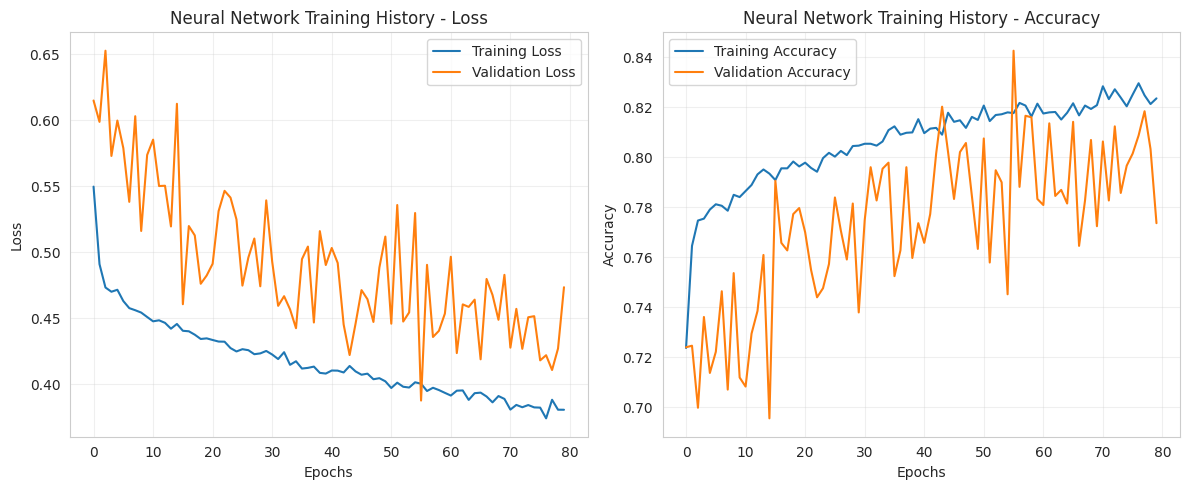

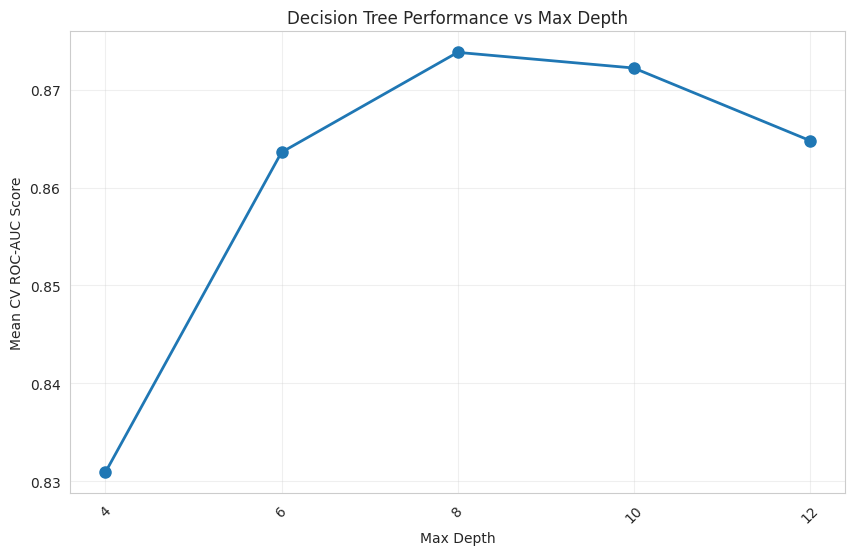

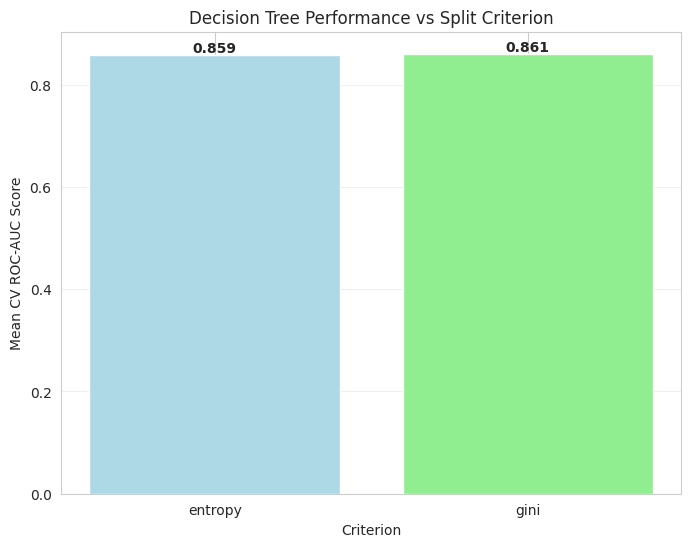

In [ ]:
"""HYPERPARAMETER TUNING VISUALIZATIONS"""
print("\n" + "="*60)
print("HYPERPARAMETER TUNING ANALYSIS")
print("="*60)

# A. Neural Network Training History
if 'history' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Loss curves
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Neural Network Training History - Loss')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Accuracy curves
    axes[1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Neural Network Training History - Accuracy')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# B. Decision Tree GridSearch Results Visualization
if 'grid_dt' in locals():
    # Convert GridSearch results to DataFrame
    results_df = pd.DataFrame(grid_dt.cv_results_)

    # Plot performance vs max_depth
    plt.figure(figsize=(10, 6))
    depth_groups = results_df.groupby('param_max_depth')['mean_test_score'].mean()
    plt.plot(depth_groups.index.astype(str), depth_groups.values, 'o-', linewidth=2, markersize=8)
    plt.xlabel('Max Depth')
    plt.ylabel('Mean CV ROC-AUC Score')
    plt.title('Decision Tree Performance vs Max Depth')
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.show()

    # Plot performance vs criterion
    plt.figure(figsize=(8, 6))
    criterion_groups = results_df.groupby('param_criterion')['mean_test_score'].mean()
    plt.bar(criterion_groups.index, criterion_groups.values, color=['lightblue', 'lightgreen'])
    plt.xlabel('Criterion')
    plt.ylabel('Mean CV ROC-AUC Score')
    plt.title('Decision Tree Performance vs Split Criterion')
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(criterion_groups.values):
        plt.text(i, v + 0.005, f'{v:.3f}', ha='center', fontweight='bold')
    plt.show()

Decssions tree confusuion matrix


DECISION TREE CONFUSION MATRICES


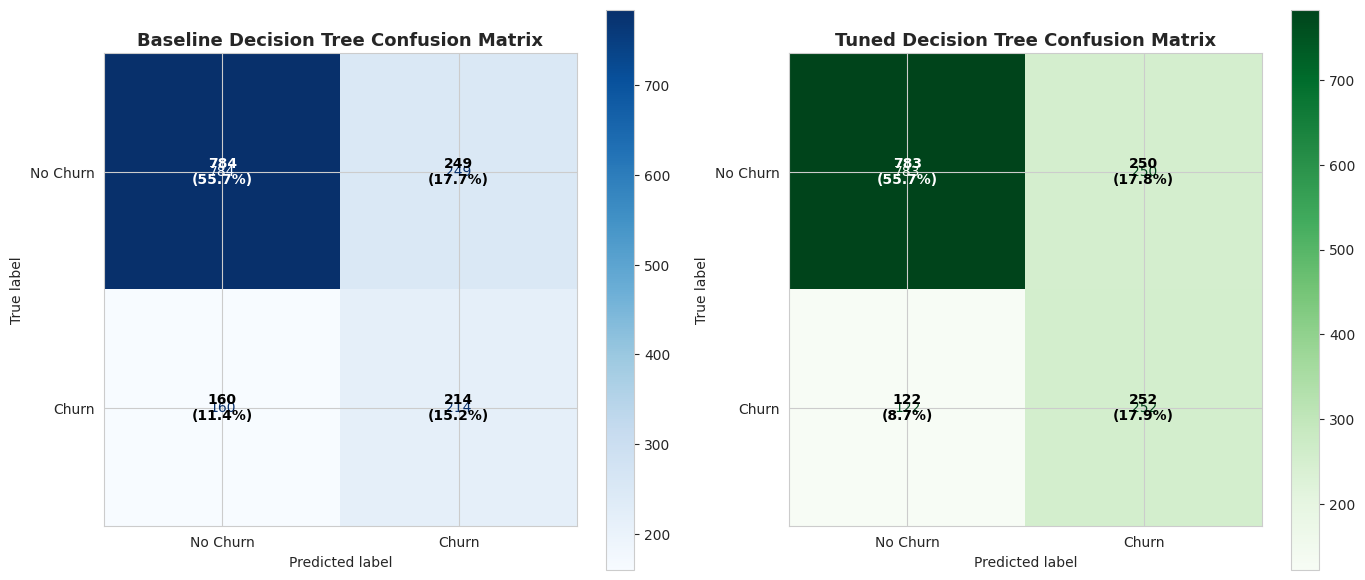


CONFUSION MATRIX ANALYSIS:
--------------------------------------------------

BASELINE DECISION TREE:
True Negatives (Correct Non-Churn):  784
False Positives (False Alarms):      249
False Negatives (Missed Churn):      160
True Positives (Correct Churn):      214
Accuracy:  70.93%
Recall:    57.22%
Precision: 46.22%

TUNED DECISION TREE:
True Negatives (Correct Non-Churn):  783
False Positives (False Alarms):      250
False Negatives (Missed Churn):      122
True Positives (Correct Churn):      252
Accuracy:  73.56%
Recall:    67.38%
Precision: 50.20%

IMPROVEMENT AFTER TUNING:
Recall Improvement:    +10.16%
Precision Improvement: +3.98%
Accuracy Improvement:  +2.63%
--------------------------------------------------


In [ ]:
"""DECISION TREE CONFUSION MATRICES"""
print("\n" + "="*60)
print("DECISION TREE CONFUSION MATRICES")
print("="*60)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. BASELINE DECISION TREE CONFUSION MATRIX
cm_baseline = confusion_matrix(y_test_dt, baseline_dt_pred)
disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_baseline,
                                       display_labels=['No Churn', 'Churn'])
disp_baseline.plot(cmap='Blues', ax=axes[0], values_format='d')
axes[0].set_title('Baseline Decision Tree Confusion Matrix', fontsize=13, fontweight='bold')

# Add text annotations with percentages
total_baseline = cm_baseline.sum()
for i in range(2):
    for j in range(2):
        count = cm_baseline[i, j]
        percentage = count / total_baseline * 100
        axes[0].text(j, i, f'{count}\n({percentage:.1f}%)',
                    ha='center', va='center',
                    color='white' if cm_baseline[i, j] > cm_baseline.max()/2 else 'black',
                    fontweight='bold')

# 2. TUNED DECISION TREE CONFUSION MATRIX
cm_tuned = confusion_matrix(y_test_dt, tuned_dt_pred)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned,
                                    display_labels=['No Churn', 'Churn'])
disp_tuned.plot(cmap='Greens', ax=axes[1], values_format='d')
axes[1].set_title('Tuned Decision Tree Confusion Matrix', fontsize=13, fontweight='bold')

# Add text annotations with percentages
total_tuned = cm_tuned.sum()
for i in range(2):
    for j in range(2):
        count = cm_tuned[i, j]
        percentage = count / total_tuned * 100
        axes[1].text(j, i, f'{count}\n({percentage:.1f}%)',
                    ha='center', va='center',
                    color='white' if cm_tuned[i, j] > cm_tuned.max()/2 else 'black',
                    fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed confusion matrix analysis
print("\nCONFUSION MATRIX ANALYSIS:")
print("-"*50)

# Baseline Decision Tree Analysis
tn_b, fp_b, fn_b, tp_b = cm_baseline.ravel()
print("\nBASELINE DECISION TREE:")
print(f"True Negatives (Correct Non-Churn):  {tn_b}")
print(f"False Positives (False Alarms):      {fp_b}")
print(f"False Negatives (Missed Churn):      {fn_b}")
print(f"True Positives (Correct Churn):      {tp_b}")
print(f"Accuracy:  {(tn_b + tp_b) / total_baseline:.2%}")
print(f"Recall:    {tp_b / (tp_b + fn_b):.2%}")
print(f"Precision: {tp_b / (tp_b + fp_b):.2%}")

# Tuned Decision Tree Analysis
tn_t, fp_t, fn_t, tp_t = cm_tuned.ravel()
print("\nTUNED DECISION TREE:")
print(f"True Negatives (Correct Non-Churn):  {tn_t}")
print(f"False Positives (False Alarms):      {fp_t}")
print(f"False Negatives (Missed Churn):      {fn_t}")
print(f"True Positives (Correct Churn):      {tp_t}")
print(f"Accuracy:  {(tn_t + tp_t) / total_tuned:.2%}")
print(f"Recall:    {tp_t / (tp_t + fn_t):.2%}")
print(f"Precision: {tp_t / (tp_t + fp_t):.2%}")

# Improvement analysis
print("\nIMPROVEMENT AFTER TUNING:")
print(f"Recall Improvement:    {tp_t/(tp_t+fn_t) - tp_b/(tp_b+fn_b):+.2%}")
print(f"Precision Improvement: {tp_t/(tp_t+fp_t) - tp_b/(tp_b+fp_b):+.2%}")
print(f"Accuracy Improvement:  {(tn_t+tp_t)/total_tuned - (tn_b+tp_b)/total_baseline:+.2%}")
print("-"*50)

ROC curves


NEURAL NETWORK - ROC CURVE ANALYSIS
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


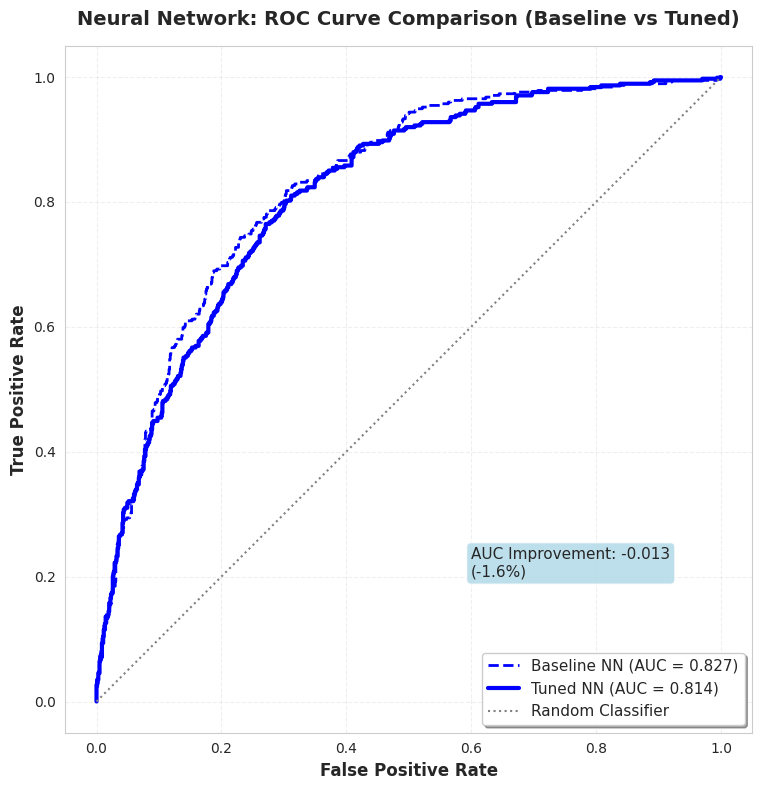


NEURAL NETWORK PERFORMANCE METRICS:
--------------------------------------------------
Baseline Model:
  ROC-AUC: 0.8271
  Accuracy: 0.7918

Tuned Model:
  ROC-AUC: 0.8142
  Accuracy: 0.7775

Improvement:
  AUC Improvement: -0.0129 (-1.6%)
--------------------------------------------------


In [ ]:
"""NEURAL NETWORK ROC CURVE"""
print("\n" + "="*60)
print("NEURAL NETWORK - ROC CURVE ANALYSIS")
print("="*60)

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predictions for both NN models
nn_baseline_probs = baseline_nn.predict(X_test_nn).ravel()
nn_tuned_probs = best_nn_model.predict(X_test_nn).ravel()

# Calculate ROC curves
fpr_baseline, tpr_baseline, _ = roc_curve(y_test_nn, nn_baseline_probs)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test_nn, nn_tuned_probs)

# Calculate AUC scores
auc_baseline = auc(fpr_baseline, tpr_baseline)
auc_tuned = auc(fpr_tuned, tpr_tuned)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot both ROC curves
plt.plot(fpr_baseline, tpr_baseline, color='blue', linestyle='--',
         linewidth=2, label=f'Baseline NN (AUC = {auc_baseline:.3f})')
plt.plot(fpr_tuned, tpr_tuned, color='blue', linewidth=3,
         label=f'Tuned NN (AUC = {auc_tuned:.3f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle=':', linewidth=1.5, label='Random Classifier')

# Customize the plot
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('Neural Network: ROC Curve Comparison (Baseline vs Tuned)',
          fontsize=14, fontweight='bold', pad=15)

# Add grid and legend
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)

# Add performance improvement annotation
improvement = auc_tuned - auc_baseline
plt.text(0.6, 0.2, f'AUC Improvement: {improvement:.3f}\n({improvement/auc_baseline*100:.1f}%)',
         fontsize=11, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Ensure equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nNEURAL NETWORK PERFORMANCE METRICS:")
print("-"*50)
print(f"Baseline Model:")
print(f"  ROC-AUC: {auc_baseline:.4f}")
print(f"  Accuracy: {accuracy_score(y_test_nn, (nn_baseline_probs > 0.5).astype(int)):.4f}")
print(f"\nTuned Model:")
print(f"  ROC-AUC: {auc_tuned:.4f}")
print(f"  Accuracy: {accuracy_score(y_test_nn, (nn_tuned_probs > 0.5).astype(int)):.4f}")
print(f"\nImprovement:")
print(f"  AUC Improvement: {improvement:.4f} ({improvement/auc_baseline*100:.1f}%)")
print("-"*50)

confusion matrix